## Proyecto Machine Learning BEDU. Análisis de las elecciones para Diputados MR 

In [109]:
# Estoy analizando la información con VSCode, por lo que instale los paquetes para realizar el análisis

# !pip install seaborn
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install numpy
# !pip install plotly
# !pip install lazypredict 
# !pip install statsmodels
!pip  install skforecast

                                              0.0/424.8 kB ? eta -:--:--
     ---                                     41.0/424.8 kB 2.0 MB/s eta 0:00:01
     ---                                     41.0/424.8 kB 2.0 MB/s eta 0:00:01
     ---                                     41.0/424.8 kB 2.0 MB/s eta 0:00:01
     -------                               81.9/424.8 kB 419.2 kB/s eta 0:00:01
     ----------                           122.9/424.8 kB 554.9 kB/s eta 0:00:01
     --------------                       174.1/424.8 kB 655.4 kB/s eta 0:00:01
     --------------------                 245.8/424.8 kB 795.7 kB/s eta 0:00:01
     ---------------------------          327.7/424.8 kB 925.5 kB/s eta 0:00:01
     --------------------------------     389.1/424.8 kB 971.5 kB/s eta 0:00:01
     ------------------------------------ 424.8/424.8 kB 984.8 kB/s eta 0:00:00
                                              0.0/409.6 kB ? eta -:--:--
     ---                                   41.0/409.6 


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
# Se importan las librerias correspondientes para el análisis

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, ElasticNetCV, Lars
from sklearn.metrics import mean_squared_error, r2_score
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn import tree
from scipy.optimize import curve_fit
import statsmodels.api as sm
from skforecast import ForecasterAutoreg

In [3]:
# Se cargan como DataFrame los archivos csv de las elecciones a diputados MR.

df_DMR_1991 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_1991/1991_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_1994 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_1994/1994_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_1997 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_1997/1997_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2000 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2000/2000_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2003 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2003/2003_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2006 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2006/2006_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2009 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2009/2009_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2012 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2012/2012_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2015 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2015/2015_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2018 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2018/2018_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2021 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2021/2021_SEE_DIP_FED_MR_NAL_CAS.csv")

In [4]:
# Para un análisis inicial, podemos ver las dimenciones de cada DataFrame. Esta información nos puede dar una idea del número de candidatos en cada periodo.

print(f'''Las dimensiones de los registros son los siguientes:
DRM - 1994: {df_DMR_1994.shape[0]} filas y {df_DMR_1994.shape[1]} columnas,
DRM - 1997: {df_DMR_1997.shape[0]} filas y {df_DMR_1997.shape[1]} columnas,
DRM - 2000: {df_DMR_2000.shape[0]} filas y {df_DMR_2000.shape[1]} columnas,
DRM - 2003: {df_DMR_2003.shape[0]} filas y {df_DMR_2003.shape[1]} columnas,
DRM - 2006: {df_DMR_2006.shape[0]} filas y {df_DMR_2006.shape[1]} columnas,
DRM - 2009: {df_DMR_2009.shape[0]} filas y {df_DMR_2009.shape[1]} columnas,
DRM - 2012: {df_DMR_2012.shape[0]} filas y {df_DMR_2012.shape[1]} columnas,
DRM - 2015: {df_DMR_2015.shape[0]} filas y {df_DMR_2015.shape[1]} columnas,
DRM - 2018: {df_DMR_2018.shape[0]} filas y {df_DMR_2018.shape[1]} columnas,
DRM - 2021: {df_DMR_2021.shape[0]} filas y {df_DMR_2021.shape[1]} columnas''')

Las dimensiones de los registros son los siguientes:
DRM - 1994: 95728 filas y 22 columnas,
DRM - 1997: 104716 filas y 21 columnas,
DRM - 2000: 113423 filas y 19 columnas,
DRM - 2003: 120603 filas y 25 columnas,
DRM - 2006: 130488 filas y 20 columnas,
DRM - 2009: 139181 filas y 26 columnas,
DRM - 2012: 143132 filas y 29 columnas,
DRM - 2015: 148833 filas y 52 columnas,
DRM - 2018: 156808 filas y 80 columnas,
DRM - 2021: 162793 filas y 40 columnas


In [5]:
# Ahora agregaremos una columna con el periodo correspondiente en cada DataFrame

df_DMR_1994['year'] = 1994
df_DMR_1997['year'] = 1997
df_DMR_2000['year'] = 2000
df_DMR_2003['year'] = 2003
df_DMR_2006['year'] = 2006
df_DMR_2009['year'] = 2009
df_DMR_2012['year'] = 2012
df_DMR_2015['year'] = 2015
df_DMR_2018['year'] = 2018
df_DMR_2021['year'] = 2021

# Los datos de los DataFrame estan bastante limpios, podemos confirmar que no tenemos valores nulos en las columnas más relevantes
# analizando cada uno de ellos. Aqui agrego un ejemplo para corrobar que no tenemos valores nulos.
df_DMR_1991.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86710 entries, 0 to 86709
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CIRCUNSCRIPCION     86710 non-null  int64 
 1   ID_ESTADO           86710 non-null  int64 
 2   NOMBRE_ESTADO       86710 non-null  object
 3   ID_DISTRITO         86710 non-null  int64 
 4   CABECERA_DISTRITAL  86710 non-null  object
 5   ID_MUNICIPIO        86710 non-null  int64 
 6   MUNICIPIO           86710 non-null  object
 7   SECCION             86710 non-null  int64 
 8   CASILLA             86710 non-null  object
 9   PAN                 86710 non-null  int64 
 10  PRI                 86710 non-null  int64 
 11  PPS                 86710 non-null  int64 
 12  PRD                 86710 non-null  int64 
 13  PFCRN               86710 non-null  int64 
 14  PARM                86710 non-null  int64 
 15  PDM                 86710 non-null  int64 
 16  PRT                 86

In [6]:
# En los datos de 2021 la columna "ID_DISTRITO" fue cambiada por "ID_DISTRITO_FEDERAL", por lo que, para evitar problemas en análisis posteriores
# vamos a renombrar dicha columna

df_DMR_2021.head()

CIRCUNSCRIPCION  ID_ESTADO   NOMBRE_ESTADO  ID_DISTRITO_FEDERAL  \
0                2          1  AGUASCALIENTES                    1   
1                2          1  AGUASCALIENTES                    1   
2                2          1  AGUASCALIENTES                    1   
3                2          1  AGUASCALIENTES                    1   
4                2          1  AGUASCALIENTES                    1   

  CABECERA_DISTRITAL_FEDERAL  ID_MUNICIPIO MUNICIPIO  SECCION TIPO_CASILLA  \
0                JESUS MARIA             0       NaN        0            P   
1                JESUS MARIA             4     COSIO      387            B   
2                JESUS MARIA             4     COSIO      387            C   
3                JESUS MARIA             4     COSIO      387            C   
4                JESUS MARIA             4     COSIO      387            C   

   ID_CASILLA  ...  CAND_IND2 CAND_IND3  NUM_VOTOS_CAN_NREG  NUM_VOTOS_NULOS  \
0           1  ...        NaN       NaN                   0                0   
1           1  ...        NaN       NaN                   0               25   
2           1  ...        NaN       NaN                   0               38   
3           2  ...        NaN       NaN                   0               25   
4           3  ...        NaN       NaN                   0               27   

   TOTAL_VOTOS  LISTA_NOMINAL  ESTATUS_ACTA  TRIBUNAL  JUICIO  year  
0            1              1        Cotejo       NaN     NaN  2021  
1          510            646        Cotejo       NaN     NaN  2021  
2          519            646        Cotejo       NaN     NaN  2021  
3          513            646        Cotejo       NaN     NaN  2021  
4          495            646        Cotejo       NaN     NaN  2021  

[5 rows x 41 columns]

In [7]:
df_DMR_2021.rename(columns = {'ID_DISTRITO_FEDERAL': 'ID_DISTRITO'}, inplace = True)
df_DMR_2021.head()

CIRCUNSCRIPCION  ID_ESTADO   NOMBRE_ESTADO  ID_DISTRITO  \
0                2          1  AGUASCALIENTES            1   
1                2          1  AGUASCALIENTES            1   
2                2          1  AGUASCALIENTES            1   
3                2          1  AGUASCALIENTES            1   
4                2          1  AGUASCALIENTES            1   

  CABECERA_DISTRITAL_FEDERAL  ID_MUNICIPIO MUNICIPIO  SECCION TIPO_CASILLA  \
0                JESUS MARIA             0       NaN        0            P   
1                JESUS MARIA             4     COSIO      387            B   
2                JESUS MARIA             4     COSIO      387            C   
3                JESUS MARIA             4     COSIO      387            C   
4                JESUS MARIA             4     COSIO      387            C   

   ID_CASILLA  ...  CAND_IND2 CAND_IND3  NUM_VOTOS_CAN_NREG  NUM_VOTOS_NULOS  \
0           1  ...        NaN       NaN                   0                0   
1           1  ...        NaN       NaN                   0               25   
2           1  ...        NaN       NaN                   0               38   
3           2  ...        NaN       NaN                   0               25   
4           3  ...        NaN       NaN                   0               27   

   TOTAL_VOTOS  LISTA_NOMINAL  ESTATUS_ACTA  TRIBUNAL  JUICIO  year  
0            1              1        Cotejo       NaN     NaN  2021  
1          510            646        Cotejo       NaN     NaN  2021  
2          519            646        Cotejo       NaN     NaN  2021  
3          513            646        Cotejo       NaN     NaN  2021  
4          495            646        Cotejo       NaN     NaN  2021  

[5 rows x 41 columns]

In [8]:
# Ahora concatenamos los DataFrame en funcion de las columnas en común. Los datos de las columnas que no 
# participan en cierto periodo tienen valores NaN
df_DMR = pd.concat([df_DMR_1994, df_DMR_1997, df_DMR_2000, df_DMR_2003, df_DMR_2006,
                df_DMR_2009, df_DMR_2012, df_DMR_2015, df_DMR_2018, df_DMR_2021]).reset_index(drop =True)

# Analizamos las dimensiones del DataFrame
df_DMR.shape

(1315705, 121)

In [9]:
# Los atributos del DataFrame son los siguientes:
df_DMR.columns

Index(['CIRCUNSCRIPCION', 'ID_ESTADO', 'NOMBRE_ESTADO', 'ID_DISTRITO',
       'CABECERA_DISTRITAL', 'ID_MUNICIPIO', 'MUNICIPIO', 'SECCION', 'CASILLA',
       'PAN',
       ...
       'CABECERA_DISTRITAL_FEDERAL', 'PES', 'RSP', 'FXM', 'PAN_PRI_PRD',
       'PAN_PRI', 'PRI_PRD', 'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA'],
      dtype='object', length=121)

In [10]:
# Para visualizar la información en forma de lista podemos emplear un 'for'
[print(columna) for columna in df_DMR.columns]

CIRCUNSCRIPCION
ID_ESTADO
NOMBRE_ESTADO
ID_DISTRITO
CABECERA_DISTRITAL
ID_MUNICIPIO
MUNICIPIO
SECCION
CASILLA
PAN
PRI
PPS
PRD
PFCRN
PARM
UNO_PDM
PT
PVEM
NUM_VOTOS_CAN_NREG
NUM_VOTOS_NULOS
TOTAL_VOTOS
ESTATUS_ACTA
year
PC
PDM
AC
AM
PCD
DSPPN
CONV
PSN
PAS
MP
PLM
FC
APT
APM
PBT
NVA_ALIANZA
ASDC
LISTA_NOMINAL
RUTA_ACTA
PSD
PRIMERO_MEXICO
SALVEMOS_MEXICO
TEPJF
MC
PRI_PVEM
PRD_PT_MC
PRD_PT
PRD_MC
PT_MC
OBSERVACIONES
MORENA
PH
ES
PAN_NVA_ALIANZA
CAND_IND1
CAND_IND2
CAND_IND3
CAND_IND4
CAND_IND5
CAND_IND6
CAND_IND7
CAND_IND8
CAND_IND9
CAND_IND10
CAND_IND11
CAND_IND12
CAND_IND13
CAND_IND14
CAND_IND15
CAND_IND16
CAND_IND17
CAND_IND18
CAND_IND19
CAND_IND20
CAND_IND21
CAND_IND22
TIPO_CASILLA
ID_CASILLA
EXT_CONTIGUA
NA
PAN_PRD_MC
PAN_PRD
PAN_MC
PRI_PVEM_NA
PRI_NA
PVEM_NA
PT_MORENA_ES
PT_MORENA
PT_ES
MORENA_ES
CAND_IND23
CAND_IND24
CAND_IND25
CAND_IND26
CAND_IND27
CAND_IND28
CAND_IND29
CAND_IND30
CAND_IND31
CAND_IND32
CAND_IND33
CAND_IND34
CAND_IND35
CAND_IND36
CAND_IND37
CAND_IND38
TRIBUNAL
JUICIO


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
# Vista previa del df
df_DMR.head()

CIRCUNSCRIPCION  ID_ESTADO   NOMBRE_ESTADO  ID_DISTRITO CABECERA_DISTRITAL  \
0                2          1  AGUASCALIENTES            1     Aguascalientes   
1                2          1  AGUASCALIENTES            1     Aguascalientes   
2                2          1  AGUASCALIENTES            1     Aguascalientes   
3                2          1  AGUASCALIENTES            1     Aguascalientes   
4                2          1  AGUASCALIENTES            1     Aguascalientes   

   ID_MUNICIPIO       MUNICIPIO  SECCION CASILLA    PAN  ...  \
0             1  AGUASCALIENTES        1       B 206.00  ...   
1             1  AGUASCALIENTES        1       C 217.00  ...   
2             1  AGUASCALIENTES        2       B 124.00  ...   
3             1  AGUASCALIENTES        2       C 107.00  ...   
4             1  AGUASCALIENTES        3       B 185.00  ...   

   CABECERA_DISTRITAL_FEDERAL  PES  RSP  FXM  PAN_PRI_PRD  PAN_PRI  PRI_PRD  \
0                         NaN  NaN  NaN  NaN          NaN      NaN      NaN   
1                         NaN  NaN  NaN  NaN          NaN      NaN      NaN   
2                         NaN  NaN  NaN  NaN          NaN      NaN      NaN   
3                         NaN  NaN  NaN  NaN          NaN      NaN      NaN   
4                         NaN  NaN  NaN  NaN          NaN      NaN      NaN   

   PVEM_PT_MORENA  PVEM_PT  PVEM_MORENA  
0             NaN      NaN          NaN  
1             NaN      NaN          NaN  
2             NaN      NaN          NaN  
3             NaN      NaN          NaN  
4             NaN      NaN          NaN  

[5 rows x 121 columns]

In [12]:
# La mayor parte de los partidos se encuentres desde la columna 9 en adelante
columnas_partidos = df_DMR.columns[9:]

In [13]:
# Como análisis inicial podemos agrupar las columnas en función del periodo para ver los votos totales
df_DMR_year = df_DMR.groupby('year')[columnas_partidos].sum()
df_DMR_year.head()

PAN         PRI       PPS        PRD     PFCRN      PARM  \
year                                                                    
1994  8801957.00 17177620.00 235036.00 5717685.00 386619.00 289437.00   
1997  7772166.00 11430313.00  98460.00 7514248.00      0.00      0.00   
2000        0.00 13739305.00      0.00       0.00      0.00 272024.00   
2003  8211395.00  6175712.00      0.00 4704854.00      0.00      0.00   
2006 13784938.00        0.00      0.00       0.00      0.00      0.00   

       UNO_PDM        PT       PVEM  NUM_VOTOS_CAN_NREG  ...  CAND_IND38  PES  \
year                                                     ...                    
1994 150811.00 907221.00  477256.00            48706.00  ...        0.00 0.00   
1997      0.00 754991.00 1114889.00            14208.00  ...        0.00 0.00   
2000      0.00      0.00       0.00            27738.00  ...        0.00 0.00   
2003      0.00 641830.00 1065593.00            16384.00  ...        0.00 0.00   
2006      0.00      0.00       0.00           128728.00  ...        0.00 0.00   

      RSP  FXM  PAN_PRI_PRD  PAN_PRI  PRI_PRD  PVEM_PT_MORENA  PVEM_PT  \
year                                                                     
1994 0.00 0.00         0.00     0.00     0.00            0.00     0.00   
1997 0.00 0.00         0.00     0.00     0.00            0.00     0.00   
2000 0.00 0.00         0.00     0.00     0.00            0.00     0.00   
2003 0.00 0.00         0.00     0.00     0.00            0.00     0.00   
2006 0.00 0.00         0.00     0.00     0.00            0.00     0.00   

      PVEM_MORENA  
year               
1994         0.00  
1997         0.00  
2000         0.00  
2003         0.00  
2006         0.00  

[5 rows x 104 columns]

In [14]:
# Podemos analizar los 10 partidos que, en promedio, tienen la mayor cantidad de votos 
orden = df_DMR_year.mean().sort_values(ascending = False)
print(orden[0:10])  # Se aprecia que en el top 3, tenemos atributos no correspondientes a partidos, 
# si no a la sumatoria total, lista nominal y votos totales, por lo que podemos ignorar esos datos

top_10 = orden.index[3:13]
top_11_20 = orden.index[13:23]
top_21_30 = orden.index[23:33]


year              264311012.60
LISTA_NOMINAL      49417231.90
TOTAL_VOTOS        39960827.90
PRI                10530829.40
PAN                 8819980.80
MORENA              4038745.00
PRD                 3918617.40
NUM_VOTOS_NULOS     1492132.80
PVEM                1475288.30
AC                  1422828.30
dtype: float64


In [15]:
df_DMR_year[top_10] # Pudiesemos quitar los votos nulos, pero los deje porrque considero que es información interesante

PRI         PAN      MORENA        PRD  NUM_VOTOS_NULOS  \
year                                                                   
1994 17177620.00  8801957.00        0.00 5717685.00       1146122.00   
1997 11430313.00  7772166.00        0.00 7514248.00        854675.00   
2000 13739305.00        0.00        0.00       0.00        864289.00   
2003  6175712.00  8211395.00        0.00 4704854.00        898554.00   
2006        0.00 13784938.00        0.00       0.00       1036287.00   
2009 12714314.00  9688690.00        0.00 4220695.00       1869254.00   
2012 14877736.00 12895515.00        0.00 8202920.00       2472613.00   
2015 11436677.00  8351120.00  3326038.00 4291902.00       1889613.00   
2018  9202896.00  9904059.00 20480882.00 2840980.00       2227598.00   
2021  8553721.00  8789968.00 16580530.00 1692890.00       1662323.00   

           PVEM          AC         PBT         APM         MC  
year                                                            
1994  477256.00        0.00        0.00        0.00       0.00  
1997 1114889.00        0.00        0.00        0.00       0.00  
2000       0.00 14228283.00        0.00        0.00       0.00  
2003 1065593.00        0.00        0.00        0.00       0.00  
2006       0.00        0.00 11969449.00 11647698.00       0.00  
2009 2256620.00        0.00        0.00        0.00       0.00  
2012 2020768.00        0.00        0.00        0.00 1286139.00  
2015 2579327.00        0.00        0.00        0.00 2420791.00  
2018 2616601.00        0.00        0.00        0.00 2374376.00  
2021 2621829.00        0.00        0.00        0.00 3430507.00

In [16]:
# df_DMR_year.max().sort_values(ascending = False)

In [17]:
# Análisis general de los atributos
df_DMR_year.describe()

PAN         PRI       PPS        PRD     PFCRN      PARM  \
count       10.00       10.00     10.00      10.00     10.00     10.00   
mean   8819980.80 10530829.40  33349.60 3918617.40  38661.90  56146.10   
std    3691914.14  4891088.88  77326.39 2832264.55 122259.66 118437.51   
min          0.00        0.00      0.00       0.00      0.00      0.00   
25%    8246326.25  8716014.75      0.00 1979912.50      0.00      0.00   
50%    8795962.50 11433495.00      0.00 4256298.50      0.00      0.00   
75%    9850216.75 13483057.25      0.00 5464477.25      0.00      0.00   
max   13784938.00 17177620.00 235036.00 8202920.00 386619.00 289437.00   

        UNO_PDM         PT       PVEM  NUM_VOTOS_CAN_NREG  ...  CAND_IND38  \
count     10.00      10.00      10.00               10.00  ...       10.00   
mean   15081.10  948404.30 1475288.30            45353.50  ...      491.60   
std    47690.63  625714.84 1074494.02            32532.81  ...     1554.58   
min        0.00       0.00       0.00            14208.00  ...        0.00   
25%        0.00  670120.25  624340.25            28959.75  ...        0.00   
50%        0.00 1011691.00 1567828.50            38428.00  ...        0.00   
75%        0.00 1338954.00 2498650.25            51049.00  ...        0.00   
max   150811.00 1935369.00 2621829.00           128728.00  ...     4916.00   

             PES       RSP        FXM  PAN_PRI_PRD  PAN_PRI  PRI_PRD  \
count      10.00     10.00      10.00        10.00    10.00    10.00   
mean   134585.80  86521.50  121182.40     21651.90  7150.00  2444.00   
std    425597.67 273605.01  383212.40     68469.32 22610.29  7728.61   
min         0.00      0.00       0.00         0.00     0.00     0.00   
25%         0.00      0.00       0.00         0.00     0.00     0.00   
50%         0.00      0.00       0.00         0.00     0.00     0.00   
75%         0.00      0.00       0.00         0.00     0.00     0.00   
max   1345858.00 865215.00 1211824.00    216519.00 71500.00 24440.00   

       PVEM_PT_MORENA  PVEM_PT  PVEM_MORENA  
count           10.00    10.00        10.00  
mean          5120.80  2247.20      2510.80  
std          16193.39  7106.27      7939.85  
min              0.00     0.00         0.00  
25%              0.00     0.00         0.00  
50%              0.00     0.00         0.00  
75%              0.00     0.00         0.00  
max          51208.00 22472.00     25108.00  

[8 rows x 104 columns]

In [18]:
# Se pueden borrar las columnas que no sean de interes de la siguiente forma
# df_DMR_year.drop(['TOTAL_VOTOS', 'LISTA_NOMINAL'], axis = 1, inplace = True)

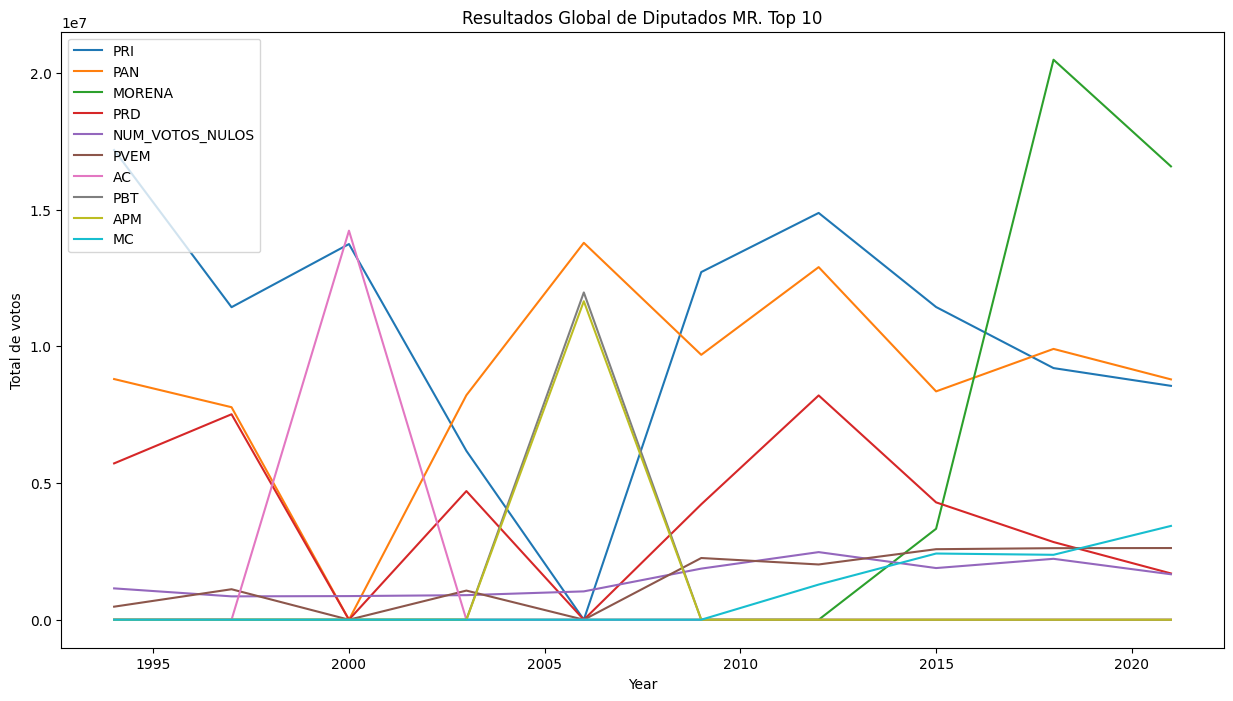

In [19]:
# Para un análisis inicial podemos visualizar el top 10 de los partidos y despues los menos relevantes

leyendas = []
plt.figure(figsize = (15, 8))
for columna in top_10:
    plt.plot(df_DMR_year.index, df_DMR_year[columna])
    leyendas.append(columna)
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.legend(leyendas)
plt.title('Resultados Global de Diputados MR. Top 10')
plt.show()

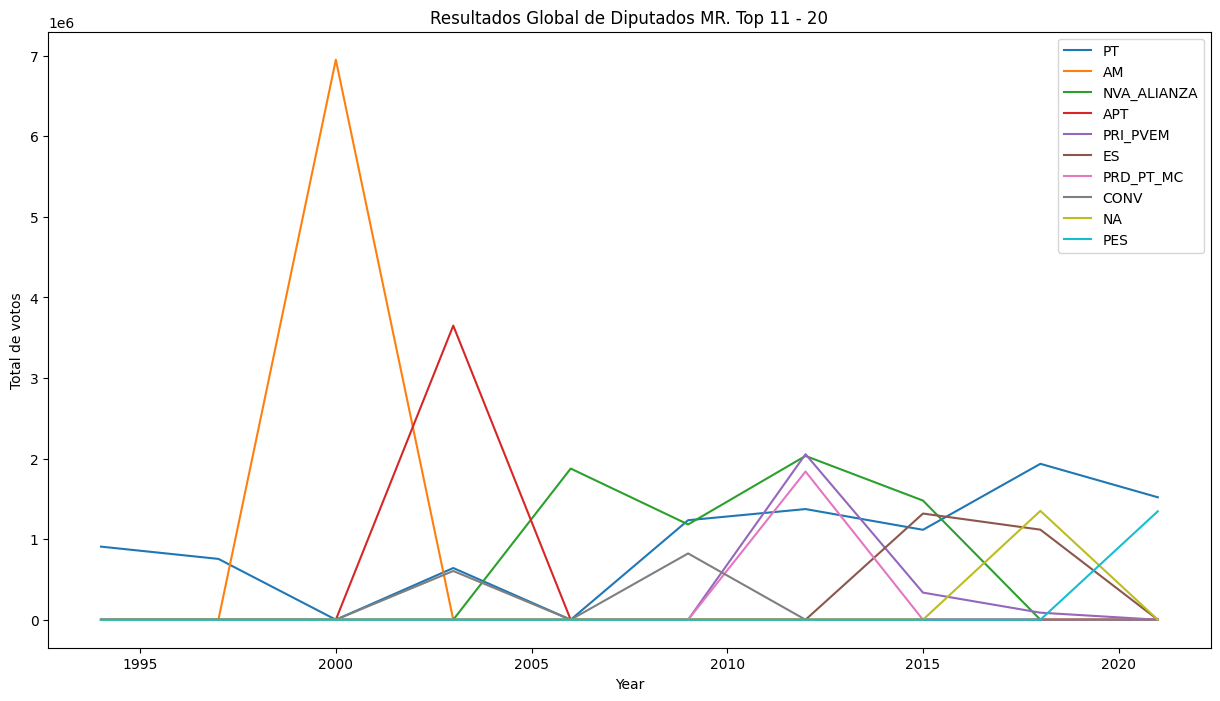

In [20]:
# Top 11 - 20

leyendas = []
plt.figure(figsize = (15, 8))
for columna in top_11_20:
    plt.plot(df_DMR_year.index, df_DMR_year[columna])
    leyendas.append(columna)
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.legend(leyendas)
plt.title('Resultados Global de Diputados MR. Top 11 - 20')

plt.show()

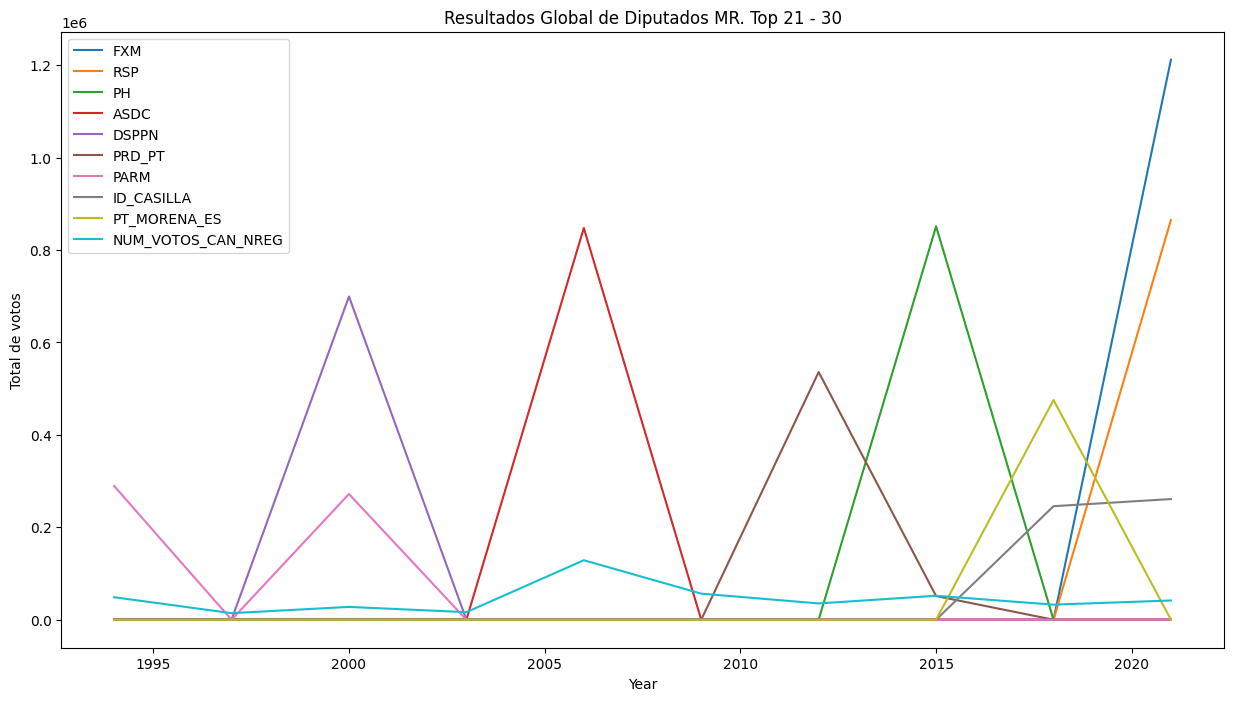

In [21]:
# Top 21 - 30. Algo interesante que se aprecia en la gráfica es que muchos partidos en esta categoría solo participaron durante un periodo.

leyendas = []
plt.figure(figsize = (15, 8))
for columna in top_21_30:
    plt.plot(df_DMR_year.index, df_DMR_year[columna])
    leyendas.append(columna)
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.legend(leyendas)
plt.title('Resultados Global de Diputados MR. Top 21 - 30')
plt.show()

In [22]:
# Ahora estaremos analizando los resultados estatales en Jalisco. Para ello agrupados los datos en funcion del periodo y de los estados

# Agrupando la información por estado:
df_DMR_year_estado = df_DMR.groupby(['year','NOMBRE_ESTADO'])[columnas_partidos].sum()
df_DMR_year_estado.drop('year', axis = 1, inplace = True)
df_DMR_year_estado = df_DMR_year_estado.reset_index()
df_DMR_year_estado.head()

year        NOMBRE_ESTADO       PAN       PRI     PPS       PRD    PFCRN  \
0  1994       AGUASCALIENTES 118395.00 158184.00 1913.00  28811.00  7899.00   
1  1994      BAJA CALIFORNIA 289093.00 398932.00 4658.00  61692.00  4622.00   
2  1994  BAJA CALIFORNIA SUR  46324.00  79548.00  447.00   7448.00   730.00   
3  1994             CAMPECHE  35898.00 122544.00 1358.00  46498.00  1482.00   
4  1994              CHIAPAS 110075.00 503542.00 7275.00 337431.00 19746.00   

     PARM  UNO_PDM       PT  ...  CAND_IND38  PES  RSP  FXM  PAN_PRI_PRD  \
0 1776.00  1507.00  6026.00  ...        0.00 0.00 0.00 0.00         0.00   
1 2804.00  2234.00 13330.00  ...        0.00 0.00 0.00 0.00         0.00   
2  578.00   468.00  2556.00  ...        0.00 0.00 0.00 0.00         0.00   
3 6378.00   562.00  2681.00  ...        0.00 0.00 0.00 0.00         0.00   
4 7724.00  1942.00 19976.00  ...        0.00 0.00 0.00 0.00         0.00   

   PAN_PRI  PRI_PRD  PVEM_PT_MORENA  PVEM_PT  PVEM_MORENA  
0     0.00     0.00            0.00     0.00         0.00  
1     0.00     0.00            0.00     0.00         0.00  
2     0.00     0.00            0.00     0.00         0.00  
3     0.00     0.00            0.00     0.00         0.00  
4     0.00     0.00            0.00     0.00         0.00  

[5 rows x 105 columns]

In [23]:
# Filtramos los datos para analizar unicamente los resultados en Jalisco
df_DMR_jalisco = df_DMR_year_estado[df_DMR_year_estado['NOMBRE_ESTADO'] == 'JALISCO']
df_DMR_jalisco.head()

year NOMBRE_ESTADO        PAN        PRI      PPS       PRD    PFCRN  \
13   1994       JALISCO  977607.00 1042044.00 12168.00 180521.00 21149.00   
45   1997       JALISCO  937248.00  745934.00  4968.00 245086.00     0.00   
77   2000       JALISCO       0.00  936849.00     0.00      0.00     0.00   
109  2003       JALISCO  899143.00  912610.00     0.00 154670.00     0.00   
141  2006       JALISCO 1311728.00       0.00     0.00      0.00     0.00   

        PARM  UNO_PDM       PT  ...  CAND_IND38  PES  RSP  FXM  PAN_PRI_PRD  \
13  14494.00 20234.00 42326.00  ...        0.00 0.00 0.00 0.00         0.00   
45      0.00     0.00 26419.00  ...        0.00 0.00 0.00 0.00         0.00   
77  18927.00     0.00     0.00  ...        0.00 0.00 0.00 0.00         0.00   
109     0.00     0.00 28932.00  ...        0.00 0.00 0.00 0.00         0.00   
141     0.00     0.00     0.00  ...        0.00 0.00 0.00 0.00         0.00   

     PAN_PRI  PRI_PRD  PVEM_PT_MORENA  PVEM_PT  PVEM_MORENA  
13      0.00     0.00            0.00     0.00         0.00  
45      0.00     0.00            0.00     0.00         0.00  
77      0.00     0.00            0.00     0.00         0.00  
109     0.00     0.00            0.00     0.00         0.00  
141     0.00     0.00            0.00     0.00         0.00  

[5 rows x 105 columns]

In [24]:
# Nuevamente ordenamos los datos en función de los votos en promedio y definimos el TOP 10
orden_jalisco = df_DMR_jalisco.mean().sort_values(ascending = False)
top_10_jalisco = orden_jalisco.index[2:12]
df_DMR_jalisco[top_10_jalisco]

PAN        PRI        MC    MORENA         AC       PRD      PVEM  \
13   977607.00 1042044.00      0.00      0.00       0.00 180521.00  26851.00   
45   937248.00  745934.00      0.00      0.00       0.00 245086.00  88489.00   
77        0.00  936849.00      0.00      0.00 1280567.00      0.00      0.00   
109  899143.00  912610.00      0.00      0.00       0.00 154670.00 194306.00   
141 1311728.00       0.00      0.00      0.00       0.00      0.00      0.00   
173  940741.00  972093.00      0.00      0.00       0.00 151224.00 226149.00   
205 1026700.00 1053033.00 399558.00      0.00       0.00 216852.00 111322.00   
237  561715.00  797581.00 852662.00  84661.00       0.00 105675.00 105422.00   
269  539606.00  513098.00 813920.00 832433.00       0.00  49685.00 159091.00   
301  478308.00  413293.00 944571.00 691372.00       0.00  26626.00 106388.00   

          APM  NUM_VOTOS_NULOS  NVA_ALIANZA  
13       0.00         64629.00         0.00  
45       0.00         56796.00         0.00  
77       0.00         50720.00         0.00  
109      0.00         53045.00         0.00  
141 919540.00         64611.00    147764.00  
173      0.00        141654.00     72956.00  
205      0.00        129563.00    109858.00  
237      0.00         89709.00     89301.00  
269      0.00        122397.00         0.00  
301      0.00         74881.00         0.00

In [25]:
# Como se puede apreciar en las columnas del DataFrame, en 2018 y 2021 participaron bastantes candidatos independientes,
# para condensar la información podemos agruparlos en una sola columna "CAND_IND_T"

df_DMR_jalisco['CAND_IND_T'] = 0
i = 1
for cand in df_DMR_jalisco.columns:
    if cand == f'CAND_IND{str(i)}':
        df_DMR_jalisco['CAND_IND_T'] = df_DMR_jalisco['CAND_IND_T'].add(df_DMR_jalisco[cand]) 
        df_DMR_jalisco.drop(cand, axis = 1, inplace = True)
        i += 1

# Corroboramos las nuevas dimensioens del DataFrame
df_DMR_jalisco.shape 

(10, 68)

In [26]:
# Podemos apreciar las columnas en forma de lista para comprobar los cambios realizados al df
[print(columna) for columna in df_DMR_jalisco.columns]

year
NOMBRE_ESTADO
PAN
PRI
PPS
PRD
PFCRN
PARM
UNO_PDM
PT
PVEM
NUM_VOTOS_CAN_NREG
NUM_VOTOS_NULOS
TOTAL_VOTOS
PC
PDM
AC
AM
PCD
DSPPN
CONV
PSN
PAS
MP
PLM
FC
APT
APM
PBT
NVA_ALIANZA
ASDC
LISTA_NOMINAL
PSD
PRIMERO_MEXICO
SALVEMOS_MEXICO
MC
PRI_PVEM
PRD_PT_MC
PRD_PT
PRD_MC
PT_MC
MORENA
PH
ES
PAN_NVA_ALIANZA
ID_CASILLA
EXT_CONTIGUA
NA
PAN_PRD_MC
PAN_PRD
PAN_MC
PRI_PVEM_NA
PRI_NA
PVEM_NA
PT_MORENA_ES
PT_MORENA
PT_ES
MORENA_ES
PES
RSP
FXM
PAN_PRI_PRD
PAN_PRI
PRI_PRD
PVEM_PT_MORENA
PVEM_PT
PVEM_MORENA
CAND_IND_T


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [27]:
# Podemos apreciar que los candidatos independientes participaron en 2018 y 2021, en 2018 los votos totales de los candidatos independientes 
# tuvieron mayor significancia.
df_DMR_jalisco[['year', 'CAND_IND_T']]

year  CAND_IND_T
13   1994        0.00
45   1997        0.00
77   2000        0.00
109  2003        0.00
141  2006        0.00
173  2009        0.00
205  2012        0.00
237  2015        0.00
269  2018   146701.00
301  2021     4097.00

In [28]:
# Este análisis es del tratamiento a los datos de los partidos de forma global

# df_DMR_year['CAND_IND_T'] = 0
# i = 1
# for cand in df_DMR_year.columns:
#     if cand == f'CAND_IND{str(i)}':
#         df_DMR_year['CAND_IND_T'] = df_DMR_year['CAND_IND_T'].add(df_DMR_year[cand]) 
#         df_DMR_year.drop(cand, axis = 1, inplace = True)
#         i += 1
# df_DMR_year.shape 

In [29]:
# df_DMR_year['CAND_IND_T']

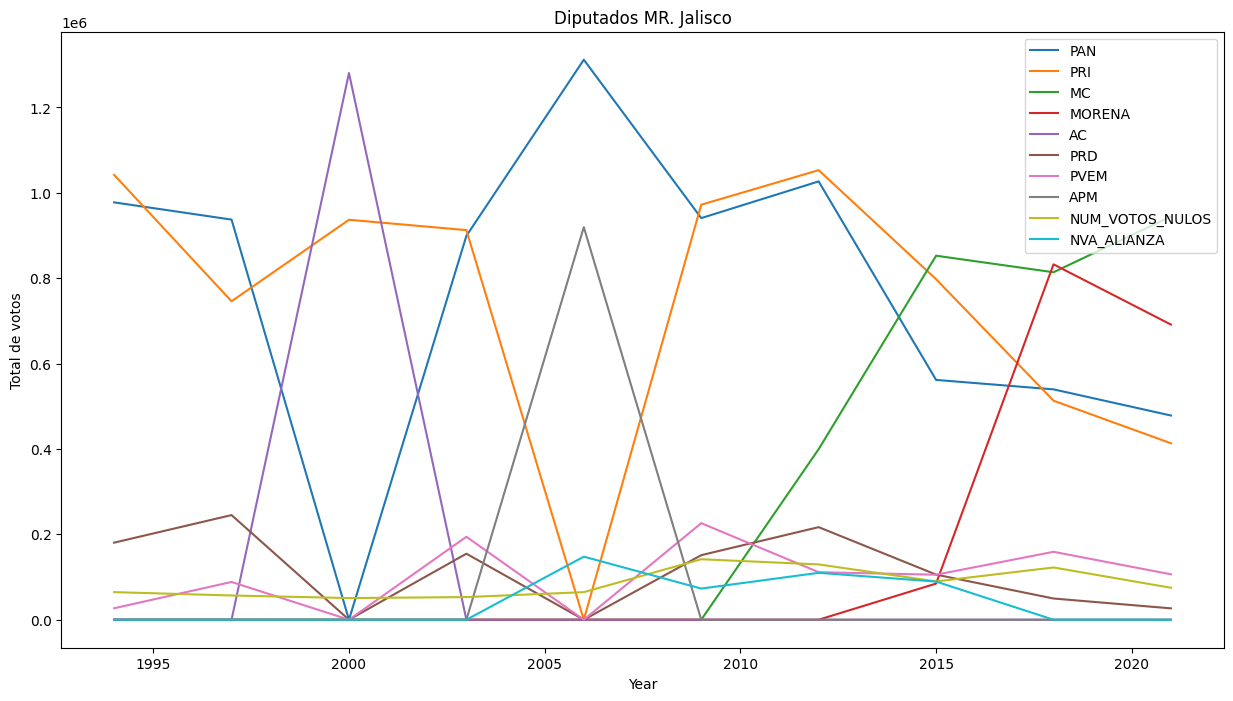

In [30]:
# Graficamos el top 10 de las elecciones de diputados MR en Jalisco

leyendas = []
plt.figure(figsize = (15, 8))
for columna in top_10_jalisco:
    plt.plot(df_DMR_jalisco['year'], df_DMR_jalisco[columna])
    leyendas.append(columna)
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.legend(leyendas)
plt.title('Diputados MR. Jalisco')
plt.show()

In [31]:
# Tambien podemos agrupar la información de Jalisco en función de los distritos 

df_distrito_jalisco = df_DMR[df_DMR['NOMBRE_ESTADO'] == 'JALISCO'].groupby(['year','ID_DISTRITO']).sum().reset_index()
df_distrito_jalisco.head()

year  ID_DISTRITO  CIRCUNSCRIPCION  ID_ESTADO  ID_MUNICIPIO  SECCION  \
0  1994            1              376       1316          3666    56550   
1  1994            2              940       3290          9165   163276   
2  1994            3             1448       5068         14118   306433   
3  1994            4              480       1680          4680   116307   
4  1994            5             1004       3514         16651   453691   

       PAN      PRI    PPS      PRD  ...  CAND_IND38  PES  RSP  FXM  \
0 20705.00 16352.00 128.00  1895.00  ...        0.00 0.00 0.00 0.00   
1 49422.00 40490.00 507.00  7652.00  ...        0.00 0.00 0.00 0.00   
2 80193.00 65147.00 891.00 11627.00  ...        0.00 0.00 0.00 0.00   
3 23998.00 21635.00 203.00  3645.00  ...        0.00 0.00 0.00 0.00   
4 32285.00 46424.00 470.00  4103.00  ...        0.00 0.00 0.00 0.00   

   PAN_PRI_PRD  PAN_PRI  PRI_PRD  PVEM_PT_MORENA  PVEM_PT  PVEM_MORENA  
0         0.00     0.00     0.00            0.00     0.00         0.00  
1         0.00     0.00     0.00            0.00     0.00         0.00  
2         0.00     0.00     0.00            0.00     0.00         0.00  
3         0.00     0.00     0.00            0.00     0.00         0.00  
4         0.00     0.00     0.00            0.00     0.00         0.00  

[5 rows x 109 columns]

In [32]:
df_distrito_jalisco.corr()

year  ID_DISTRITO  CIRCUNSCRIPCION  ID_ESTADO  ID_MUNICIPIO  \
year             1.00         0.01            -0.26       0.76          0.43   
ID_DISTRITO      0.01         1.00             0.14       0.15         -0.05   
CIRCUNSCRIPCION -0.26         0.14             1.00       0.00          0.03   
ID_ESTADO        0.76         0.15             0.00       1.00          0.52   
ID_MUNICIPIO     0.43        -0.05             0.03       0.52          1.00   
...               ...          ...              ...        ...           ...   
PAN_PRI          0.48        -0.01             0.01       0.32          0.20   
PRI_PRD          0.49         0.05             0.01       0.34          0.14   
PVEM_PT_MORENA   0.45         0.05            -0.00       0.28          0.18   
PVEM_PT          0.47         0.06            -0.00       0.28          0.13   
PVEM_MORENA      0.41         0.01             0.00       0.27          0.16   

                 SECCION   PAN   PRI   PPS   PRD  ...  CAND_IND38  PES  RSP  \
year                0.44 -0.19 -0.32 -0.57 -0.29  ...         NaN 0.50 0.39   
ID_DISTRITO        -0.05 -0.03  0.08  0.09  0.21  ...         NaN 0.04 0.06   
CIRCUNSCRIPCION     0.03  0.29  0.37  0.81  0.26  ...         NaN 0.00 0.00   
ID_ESTADO           0.52  0.07 -0.03 -0.36 -0.01  ...         NaN 0.32 0.26   
ID_MUNICIPIO        0.99  0.06 -0.02 -0.15 -0.05  ...         NaN 0.17 0.11   
...                  ...   ...   ...   ...   ...  ...         ...  ...  ...   
PAN_PRI             0.20 -0.18 -0.28 -0.12 -0.24  ...         NaN 0.85 0.62   
PRI_PRD             0.14 -0.22 -0.27 -0.12 -0.23  ...         NaN 0.91 0.71   
PVEM_PT_MORENA      0.21 -0.24 -0.28 -0.11 -0.21  ...         NaN 0.80 0.63   
PVEM_PT             0.14 -0.27 -0.29 -0.12 -0.22  ...         NaN 0.85 0.69   
PVEM_MORENA         0.17 -0.24 -0.28 -0.11 -0.20  ...         NaN 0.74 0.54   

                 FXM  PAN_PRI_PRD  PAN_PRI  PRI_PRD  PVEM_PT_MORENA  PVEM_PT  \
year            0.47         0.44     0.48     0.49            0.45     0.47   
ID_DISTRITO     0.06         0.01    -0.01     0.05            0.05     0.06   
CIRCUNSCRIPCION 0.01         0.01     0.01     0.01           -0.00    -0.00   
ID_ESTADO       0.32         0.31     0.32     0.34            0.28     0.28   
ID_MUNICIPIO    0.14         0.22     0.20     0.14            0.18     0.13   
...              ...          ...      ...      ...             ...      ...   
PAN_PRI         0.84         0.92     1.00     0.87            0.76     0.75   
PRI_PRD         0.91         0.76     0.87     1.00            0.80     0.86   
PVEM_PT_MORENA  0.75         0.81     0.76     0.80            1.00     0.88   
PVEM_PT         0.81         0.74     0.75     0.86            0.88     1.00   
PVEM_MORENA     0.67         0.70     0.67     0.70            0.72     0.86   

                 PVEM_MORENA  
year                    0.41  
ID_DISTRITO             0.01  
CIRCUNSCRIPCION         0.00  
ID_ESTADO               0.27  
ID_MUNICIPIO            0.16  
...                      ...  
PAN_PRI                 0.67  
PRI_PRD                 0.70  
PVEM_PT_MORENA          0.72  
PVEM_PT                 0.86  
PVEM_MORENA             1.00  

[109 rows x 109 columns]

In [33]:
df_distrito_jalisco_top_10 = df_distrito_jalisco[top_10_jalisco]
# df_distrito_jalisco_corr = df_distrito_jalisco.drop(columns = columnas_a_eliminar)
df_distrito_jalisco_top_10

PAN      PRI       MC   MORENA   AC      PRD     PVEM  APM  \
0   20705.00 16352.00     0.00     0.00 0.00  1895.00   653.00 0.00   
1   49422.00 40490.00     0.00     0.00 0.00  7652.00  1786.00 0.00   
2   80193.00 65147.00     0.00     0.00 0.00 11627.00  2839.00 0.00   
3   23998.00 21635.00     0.00     0.00 0.00  3645.00   854.00 0.00   
4   32285.00 46424.00     0.00     0.00 0.00  4103.00   558.00 0.00   
..       ...      ...      ...      ...  ...      ...      ...  ...   
188 15815.00 17742.00 30780.00 38779.00 0.00  1702.00  2714.00 0.00   
189 19563.00 21947.00 45259.00 34363.00 0.00   872.00 15808.00 0.00   
190 19052.00 42159.00 48137.00 38551.00 0.00  2150.00  4297.00 0.00   
191 18477.00 22354.00 52523.00 41080.00 0.00  4834.00  6509.00 0.00   
192 14749.00 26222.00 36391.00 32537.00 0.00   977.00  3066.00 0.00   

     NUM_VOTOS_NULOS  NVA_ALIANZA  
0             619.00         0.00  
1            2637.00         0.00  
2            3092.00         0.00  
3            1046.00         0.00  
4            3432.00         0.00  
..               ...          ...  
188          3131.00         0.00  
189          3897.00         0.00  
190          5058.00         0.00  
191          5032.00         0.00  
192          3311.00         0.00  

[193 rows x 10 columns]

In [34]:
top_10_jalisco

Index(['PAN', 'PRI', 'MC', 'MORENA', 'AC', 'PRD', 'PVEM', 'APM',
       'NUM_VOTOS_NULOS', 'NVA_ALIANZA'],
      dtype='object')

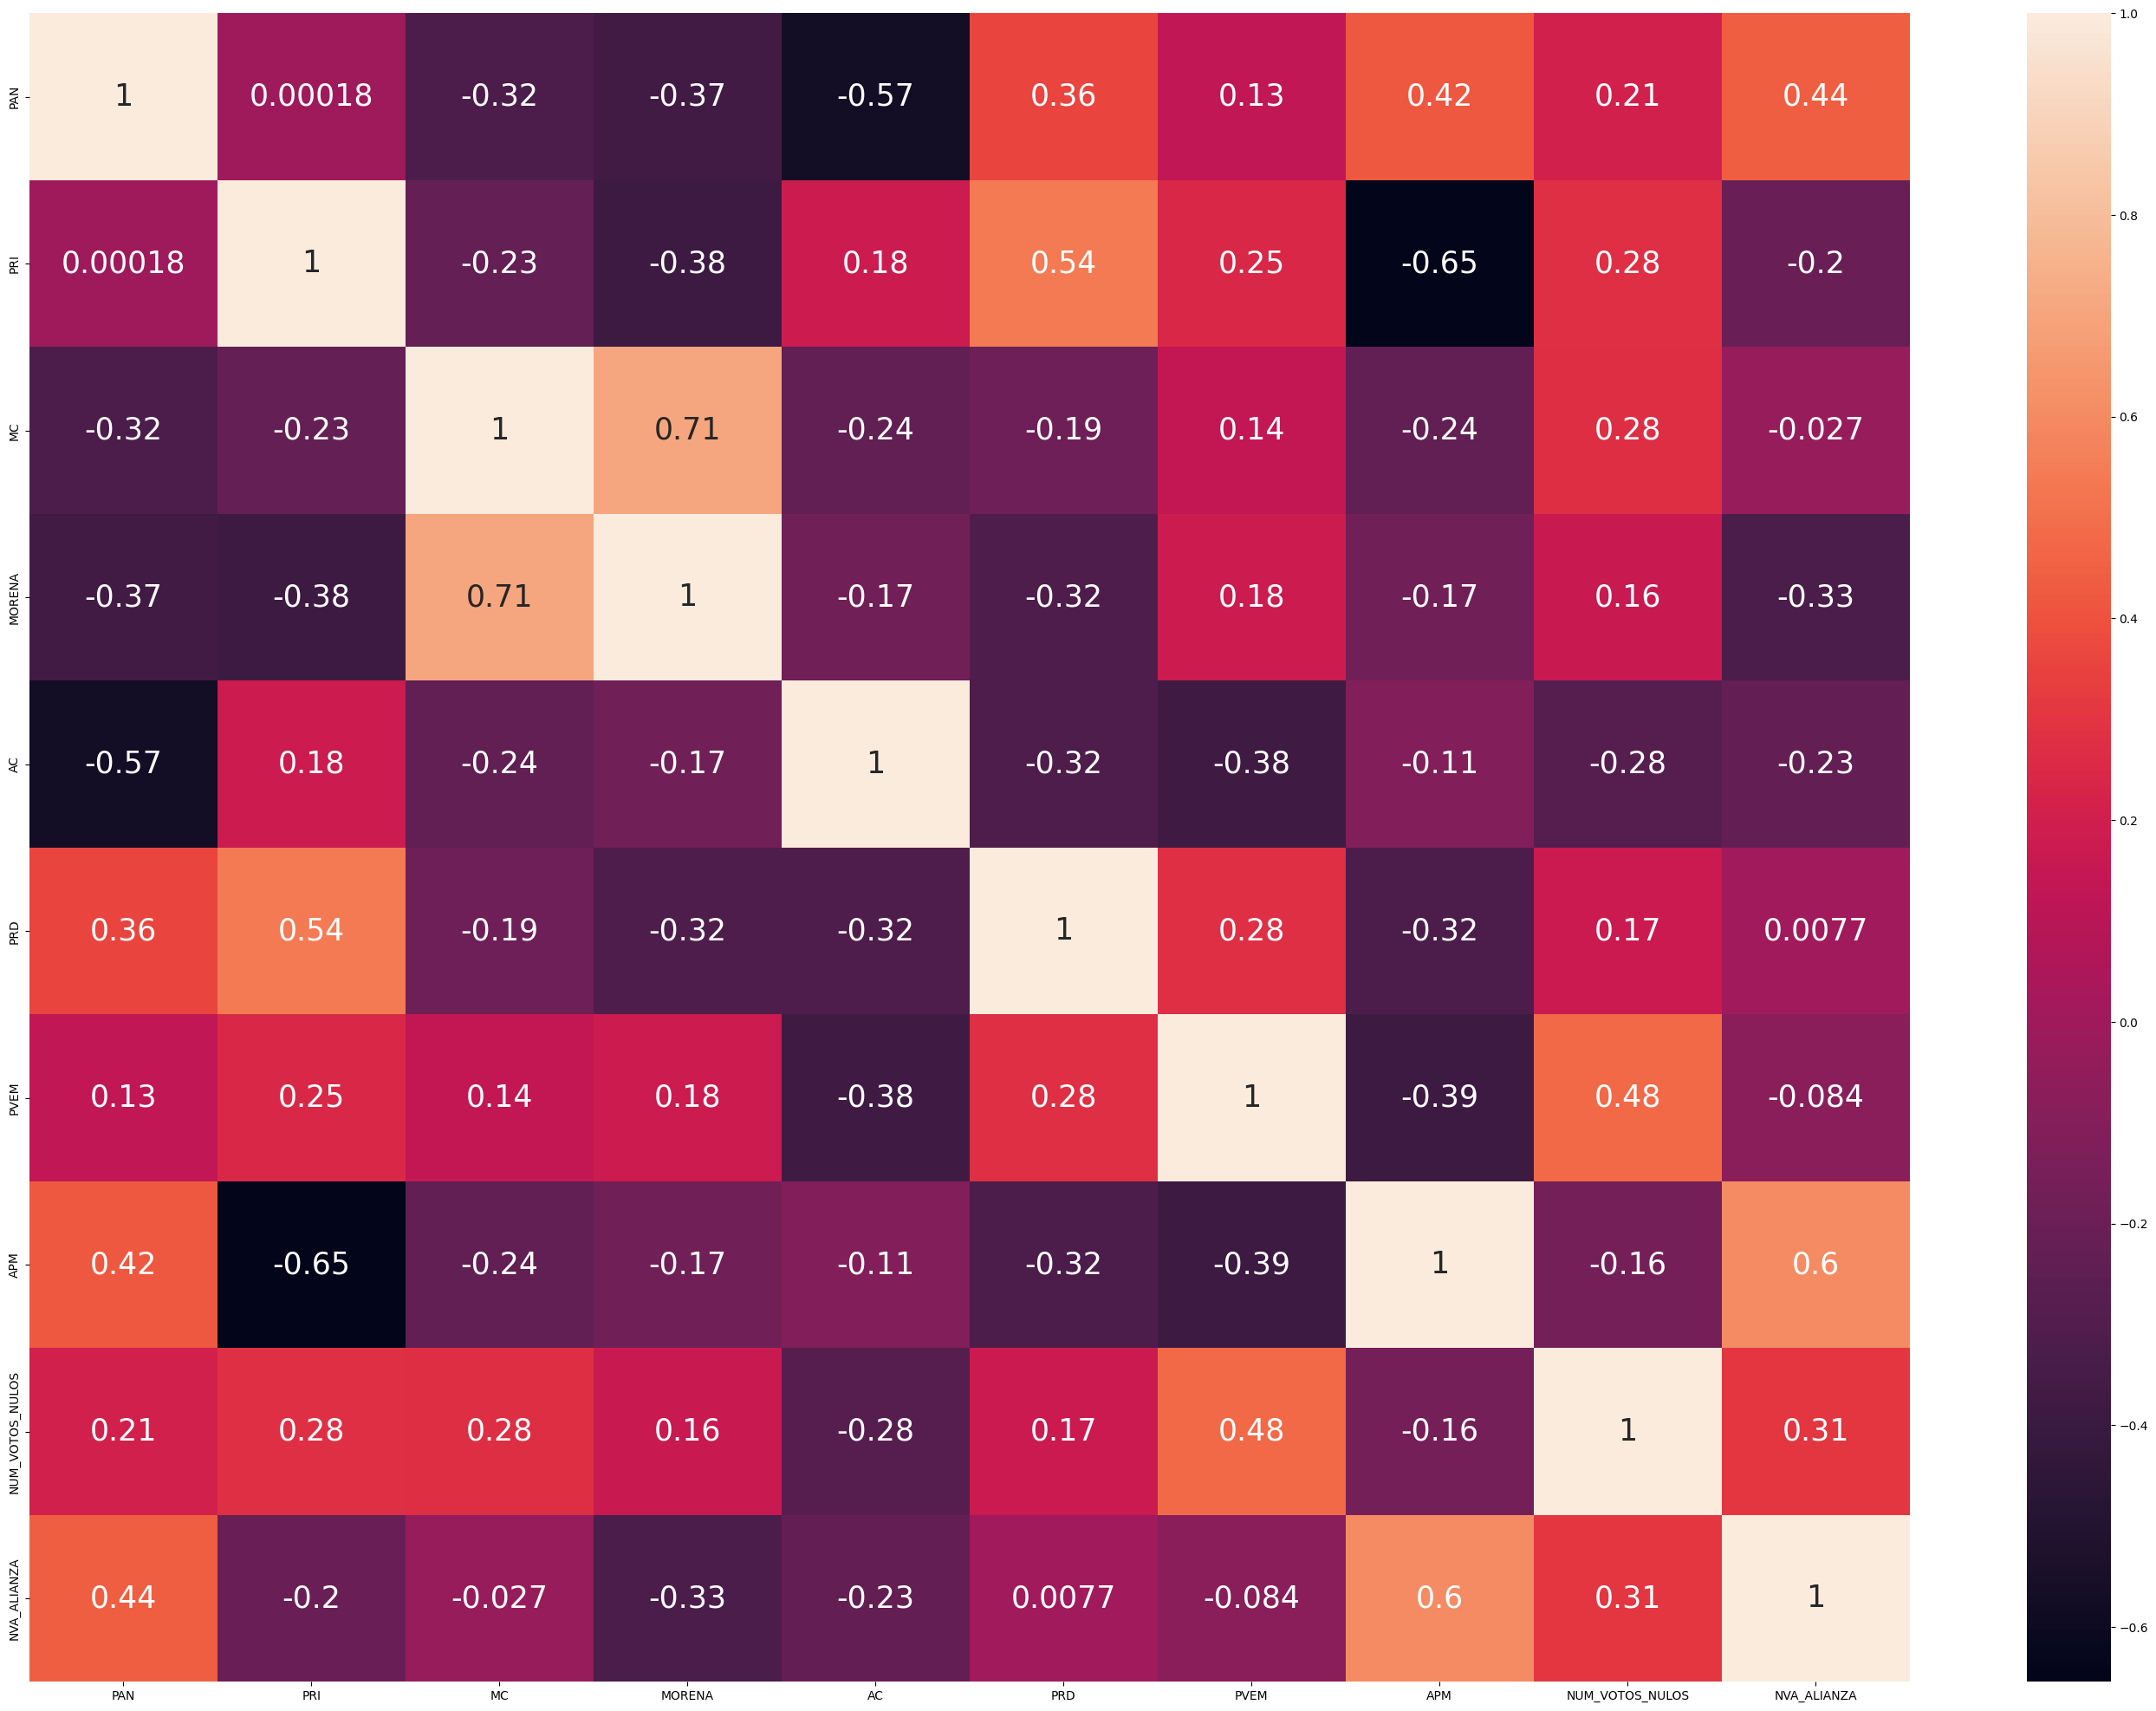

In [35]:
plt.figure(figsize=(35, 25))
sns.heatmap(df_distrito_jalisco_top_10.corr(), annot = True, annot_kws={'size': 25})
# sns.set(font_scale=1.5)
plt.show()

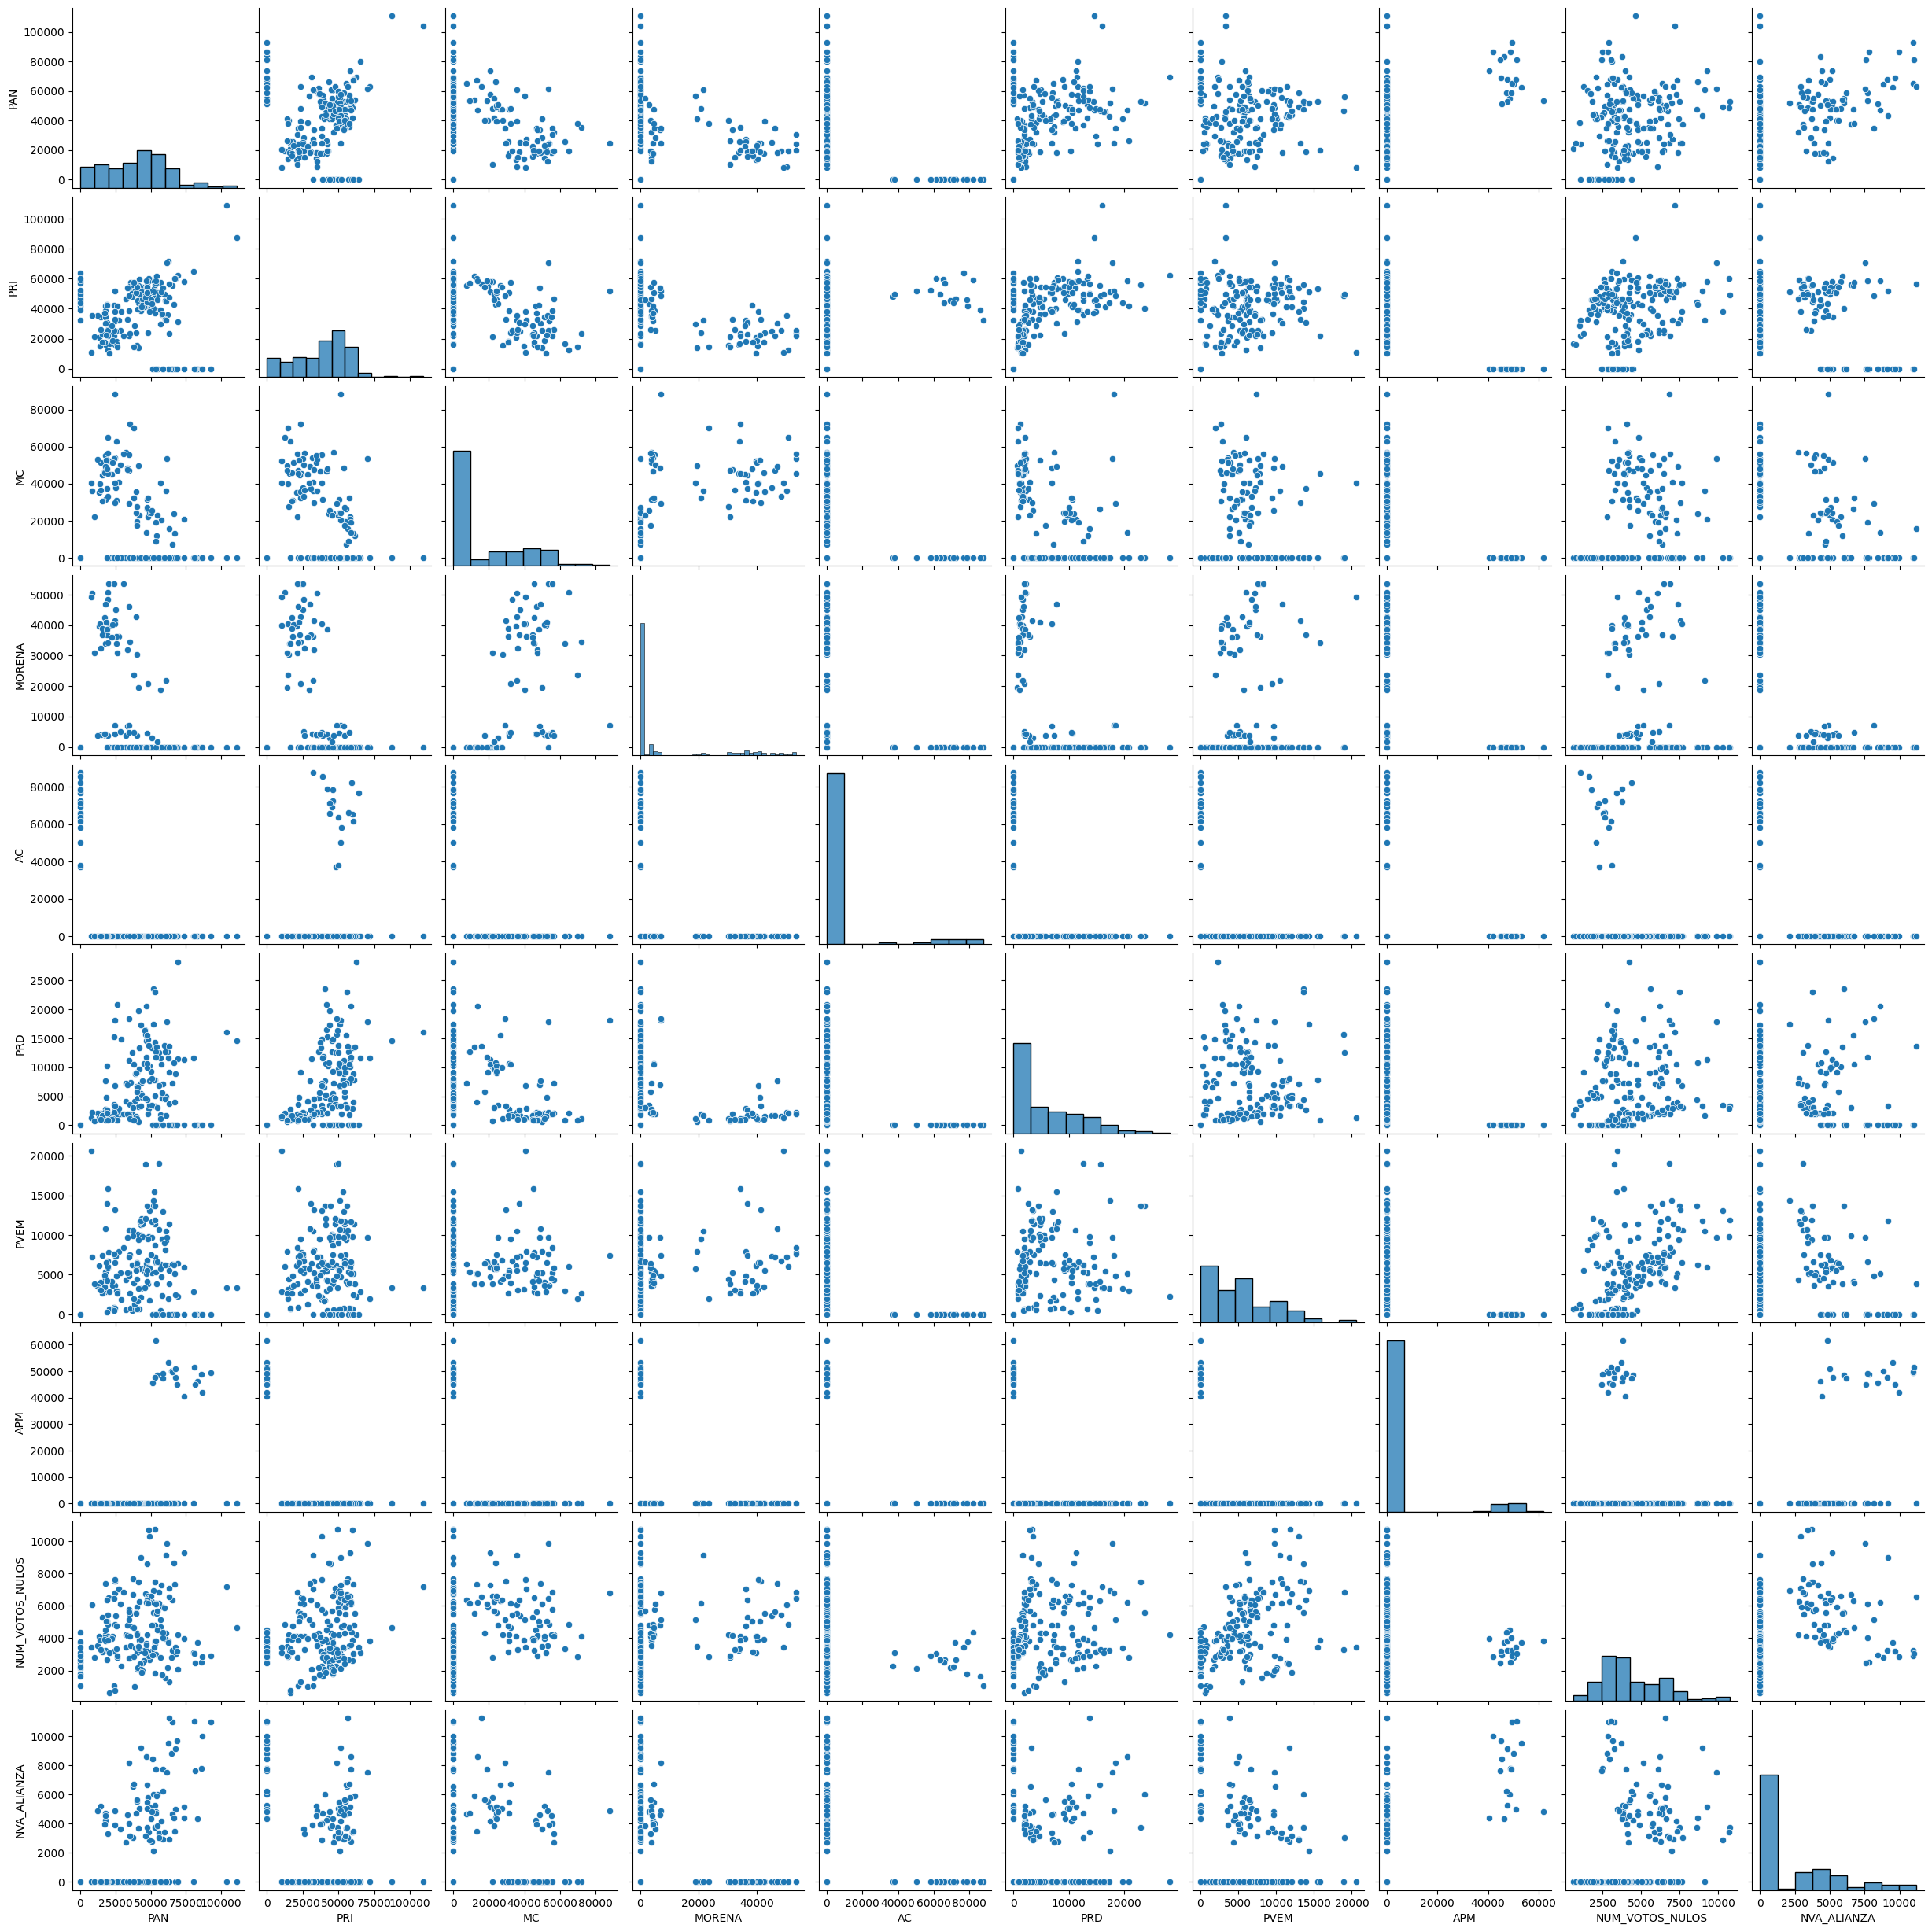

In [36]:
sns.pairplot(df_distrito_jalisco_top_10)

In [37]:
df_distrito_jalisco_top_10.head()

PAN      PRI   MC  MORENA   AC      PRD    PVEM  APM  NUM_VOTOS_NULOS  \
0 20705.00 16352.00 0.00    0.00 0.00  1895.00  653.00 0.00           619.00   
1 49422.00 40490.00 0.00    0.00 0.00  7652.00 1786.00 0.00          2637.00   
2 80193.00 65147.00 0.00    0.00 0.00 11627.00 2839.00 0.00          3092.00   
3 23998.00 21635.00 0.00    0.00 0.00  3645.00  854.00 0.00          1046.00   
4 32285.00 46424.00 0.00    0.00 0.00  4103.00  558.00 0.00          3432.00   

   NVA_ALIANZA  
0         0.00  
1         0.00  
2         0.00  
3         0.00  
4         0.00

In [38]:
df_distrito_jalisco_top_10[df_distrito_jalisco_top_10['PAN'] == 0].head()

PAN      PRI   MC  MORENA       AC  PRD  PVEM  APM  NUM_VOTOS_NULOS  \
39 0.00 48067.00 0.00    0.00 37103.00 0.00  0.00 0.00          2270.00   
40 0.00 46298.00 0.00    0.00 71990.00 0.00  0.00 0.00          3753.00   
41 0.00 42027.00 0.00    0.00 78890.00 0.00  0.00 0.00          3766.00   
42 0.00 59592.00 0.00    0.00 65187.00 0.00  0.00 0.00          2619.00   
43 0.00 51758.00 0.00    0.00 50291.00 0.00  0.00 0.00          2111.00   

    NVA_ALIANZA  
39         0.00  
40         0.00  
41         0.00  
42         0.00  
43         0.00

In [39]:
# Consideramos que los votos de AC, al ser una alianza con el PAN, son del mismo PAN
df_distrito_jalisco_top_10['PAN'] = df_distrito_jalisco_top_10['PAN'] + df_distrito_jalisco_top_10['AC']

# Consideramos que los votos de APM, al ser una alianza con el PRI, son para el PRI
df_distrito_jalisco_top_10['PRI'] = df_distrito_jalisco_top_10['PRI'] + df_distrito_jalisco_top_10['APM']

In [40]:
# Borramos las columnas de AC y APM.
df_distrito_jalisco_top_10.drop(['AC','APM'], axis = 1, inplace = True)

# Para analizar las correlaciones podemos reemplazar los 0's por NaN
df_distrito_jalisco_top_10.replace(0, np.nan, inplace=True)
df_distrito_jalisco_top_10.head()

PAN      PRI  MC  MORENA      PRD    PVEM  NUM_VOTOS_NULOS  NVA_ALIANZA
0 20705.00 16352.00 NaN     NaN  1895.00  653.00           619.00          NaN
1 49422.00 40490.00 NaN     NaN  7652.00 1786.00          2637.00          NaN
2 80193.00 65147.00 NaN     NaN 11627.00 2839.00          3092.00          NaN
3 23998.00 21635.00 NaN     NaN  3645.00  854.00          1046.00          NaN
4 32285.00 46424.00 NaN     NaN  4103.00  558.00          3432.00          NaN

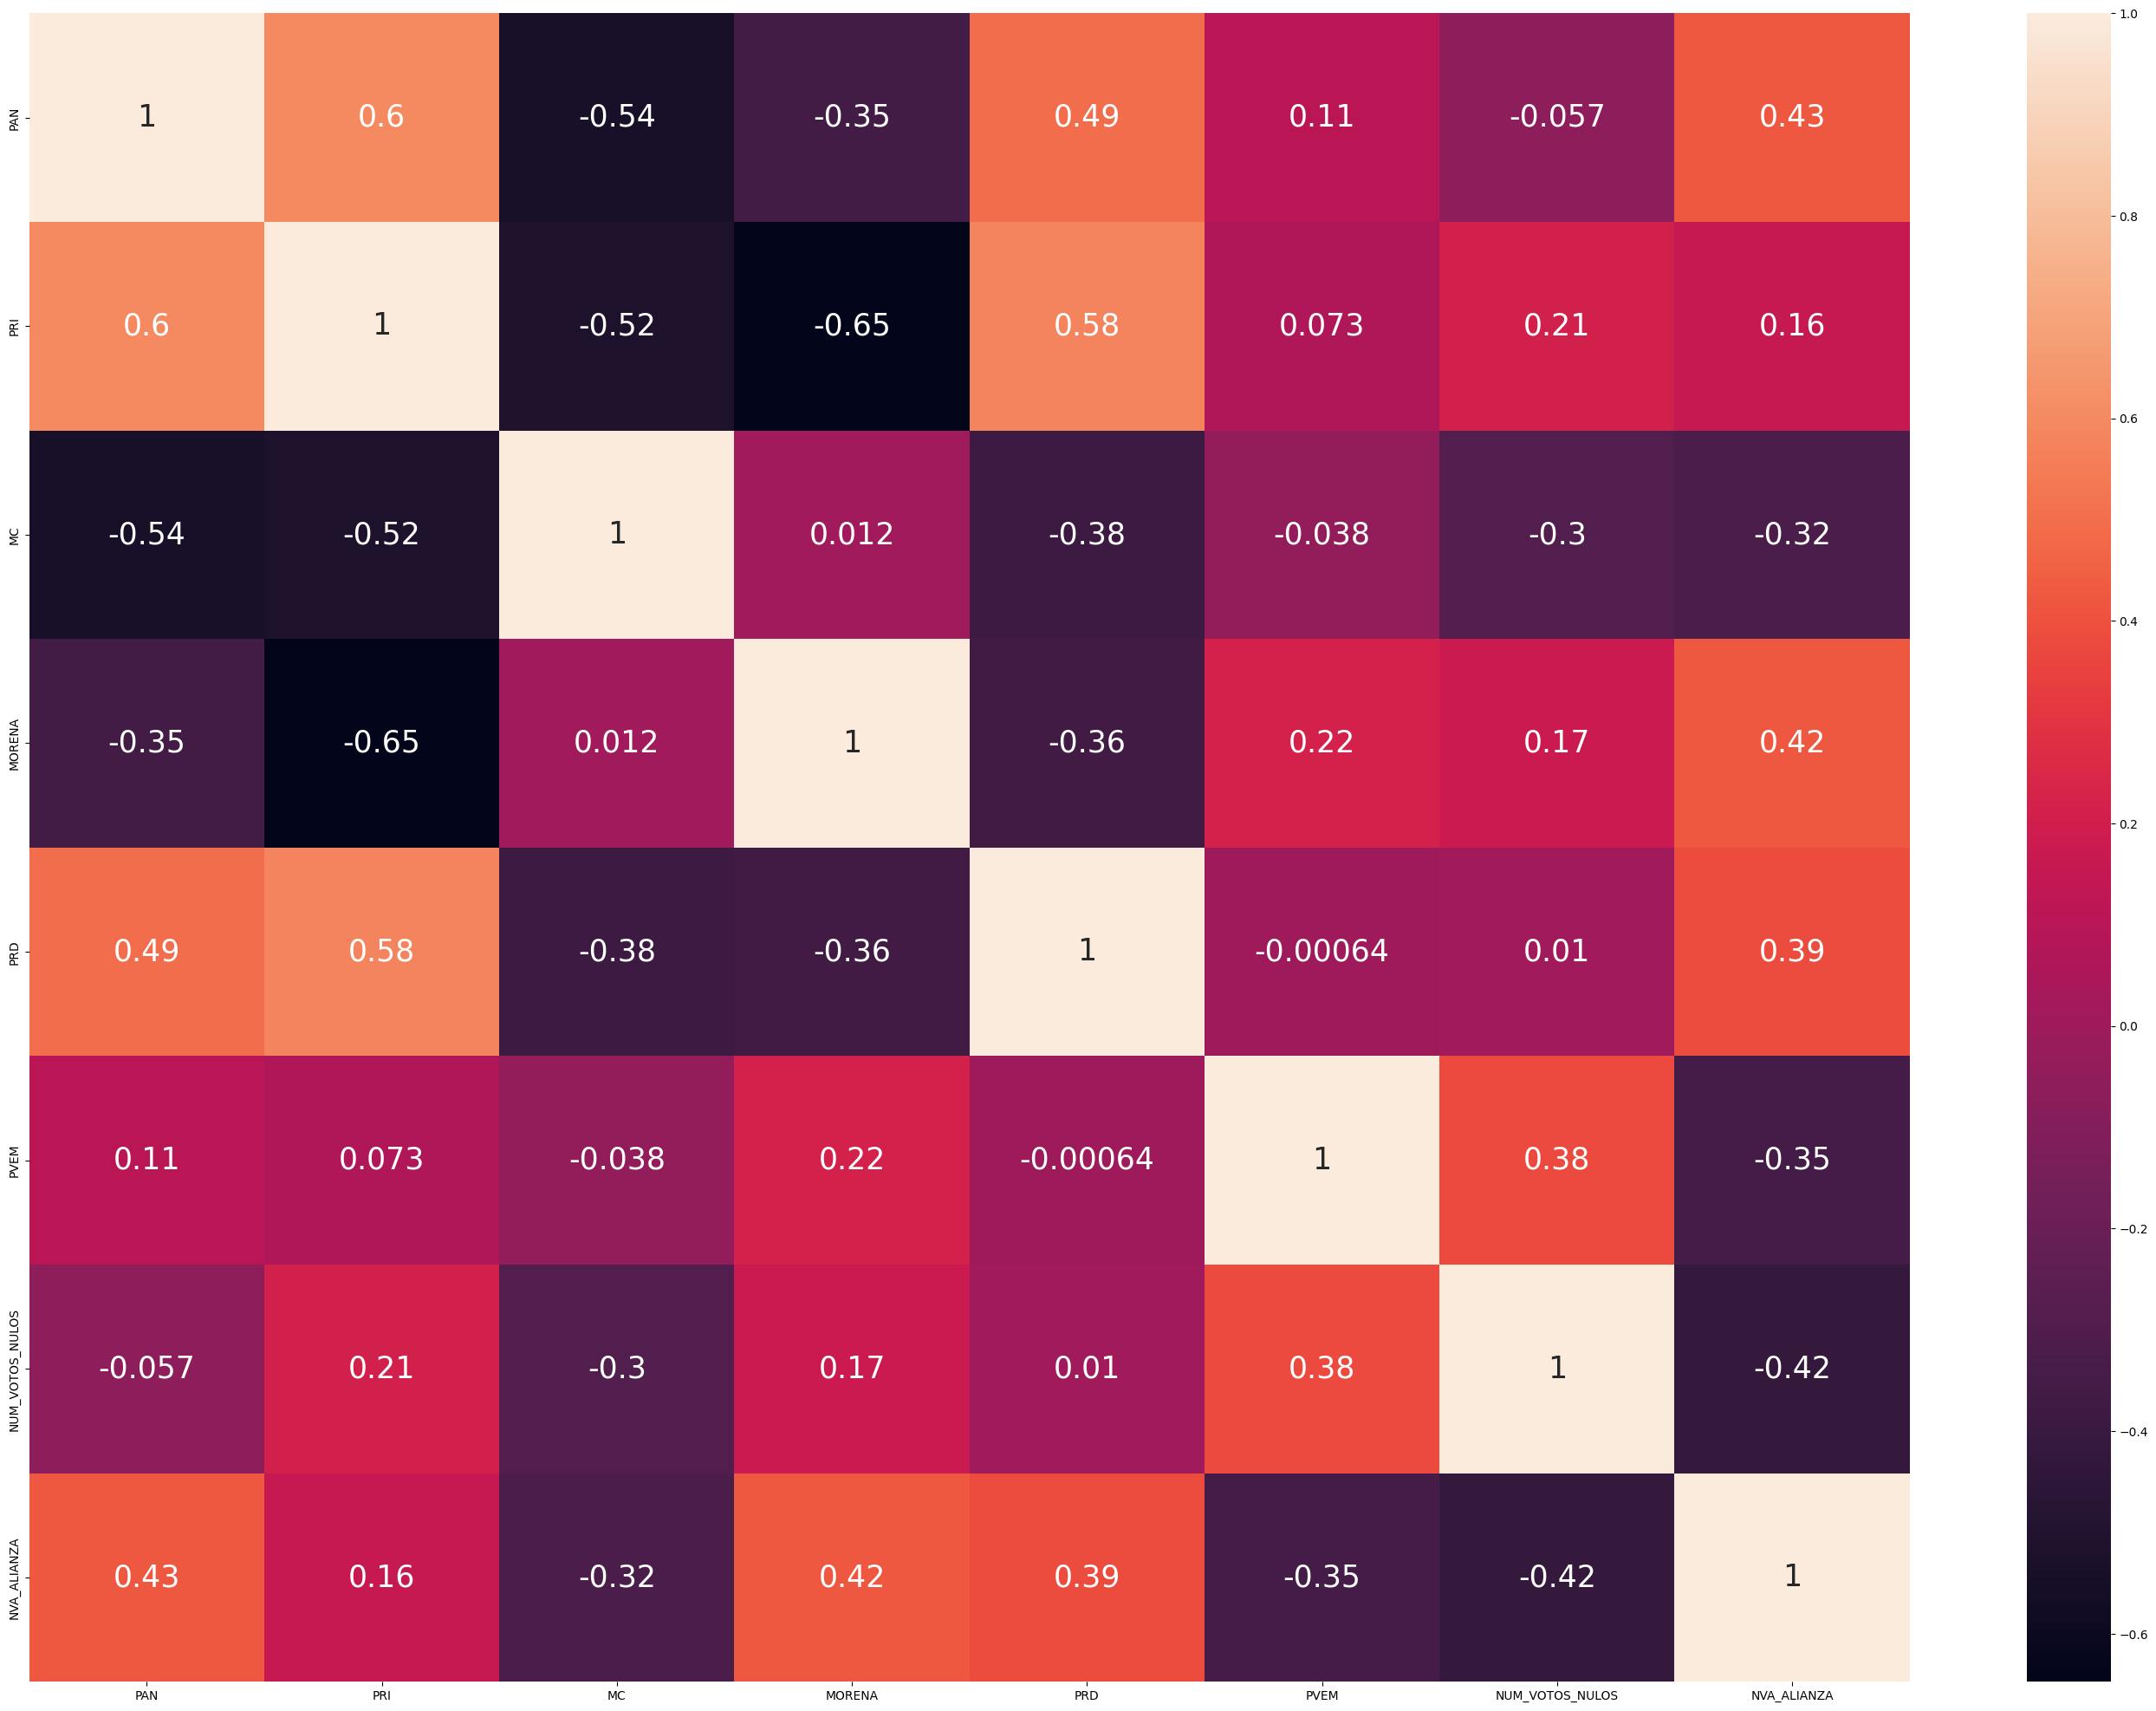

In [41]:
plt.figure(figsize=(35, 25))
sns.heatmap(df_distrito_jalisco_top_10.corr(), annot = True, annot_kws={'size': 25})
# sns.set(font_scale=1)
plt.show()

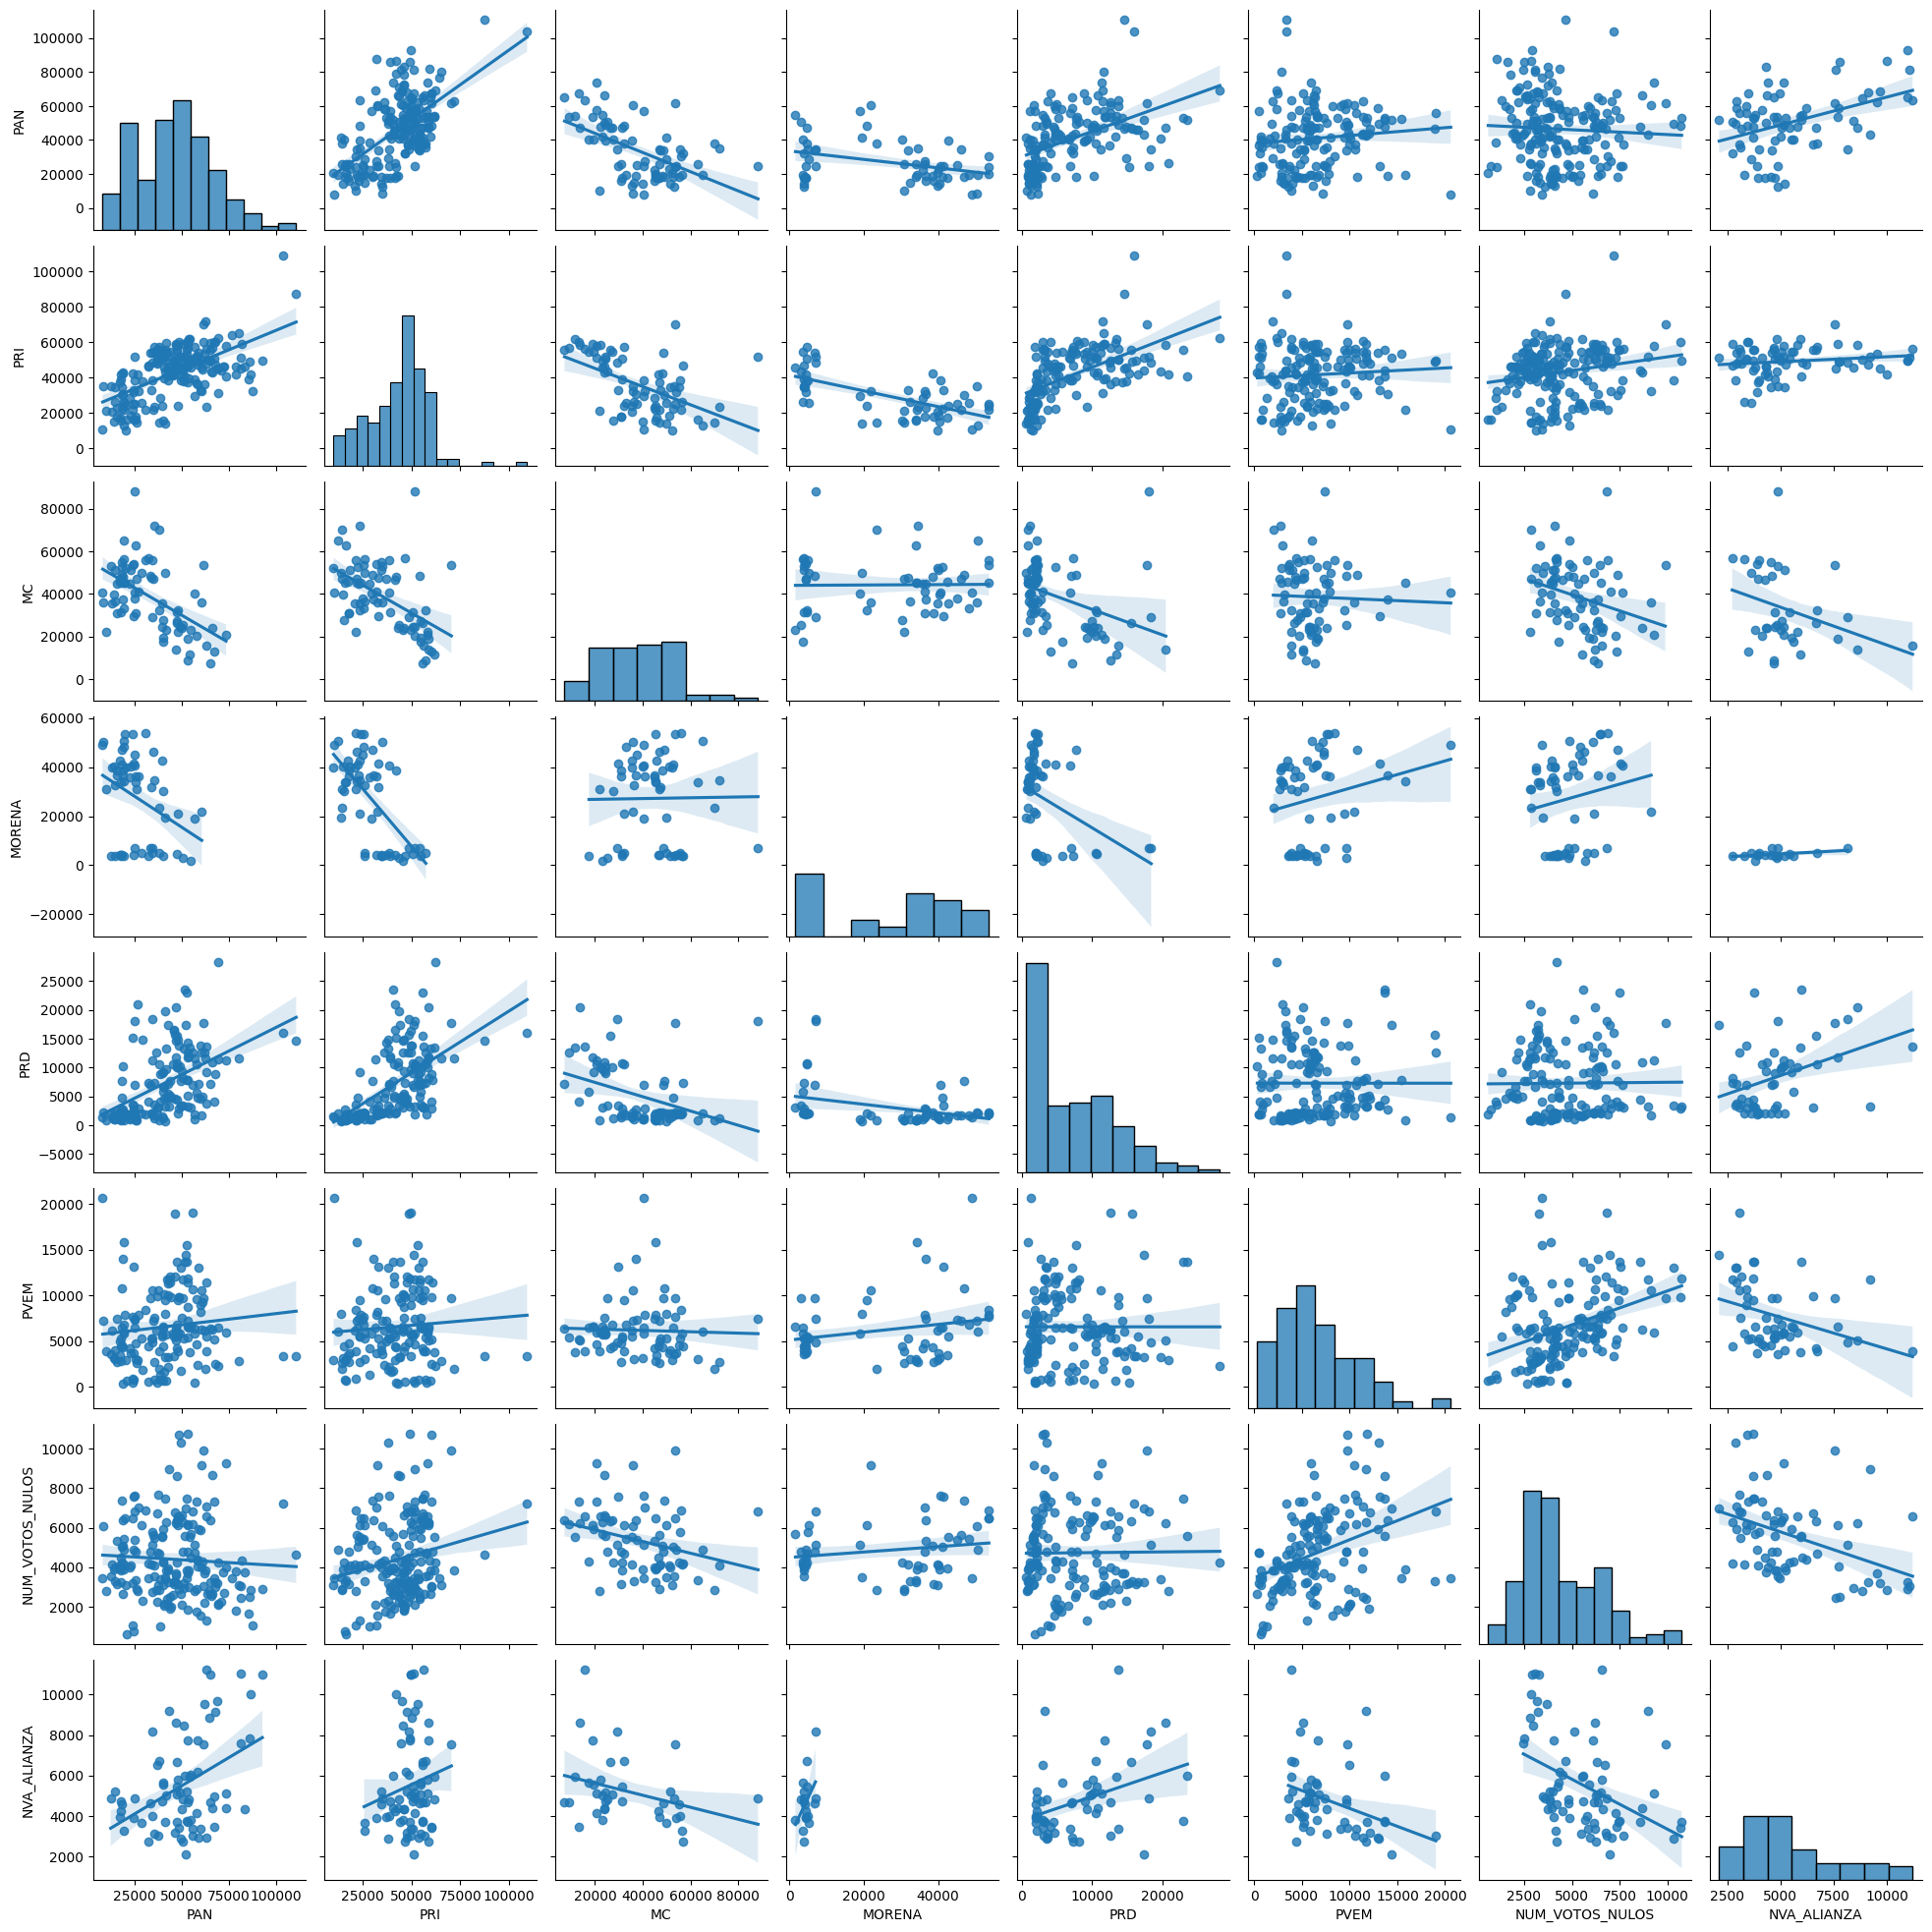

In [42]:
sns.pairplot(df_distrito_jalisco_top_10, kind='reg')   # kind efectua la regresión entre cada una de las columnas

In [43]:
df_distrito_jalisco_top_10_corr = df_distrito_jalisco_top_10.corr()
df_distrito_jalisco_top_10_corr[~((df_distrito_jalisco_top_10_corr <= 0.3) & (df_distrito_jalisco_top_10_corr >= -0.3))]


PAN   PRI    MC  MORENA   PRD  PVEM  NUM_VOTOS_NULOS  \
PAN              1.00  0.60 -0.54   -0.35  0.49   NaN              NaN   
PRI              0.60  1.00 -0.52   -0.65  0.58   NaN              NaN   
MC              -0.54 -0.52  1.00     NaN -0.38   NaN              NaN   
MORENA          -0.35 -0.65   NaN    1.00 -0.36   NaN              NaN   
PRD              0.49  0.58 -0.38   -0.36  1.00   NaN              NaN   
PVEM              NaN   NaN   NaN     NaN   NaN  1.00             0.38   
NUM_VOTOS_NULOS   NaN   NaN   NaN     NaN   NaN  0.38             1.00   
NVA_ALIANZA      0.43   NaN -0.32    0.42  0.39 -0.35            -0.42   

                 NVA_ALIANZA  
PAN                     0.43  
PRI                      NaN  
MC                     -0.32  
MORENA                  0.42  
PRD                     0.39  
PVEM                   -0.35  
NUM_VOTOS_NULOS        -0.42  
NVA_ALIANZA             1.00

In [44]:
top_jal = df_distrito_jalisco_top_10.columns
top_jal

Index(['PAN', 'PRI', 'MC', 'MORENA', 'PRD', 'PVEM', 'NUM_VOTOS_NULOS',
       'NVA_ALIANZA'],
      dtype='object')

In [45]:
df_distrito_jalisco_top_10_corr.iloc[0][0]

1.0

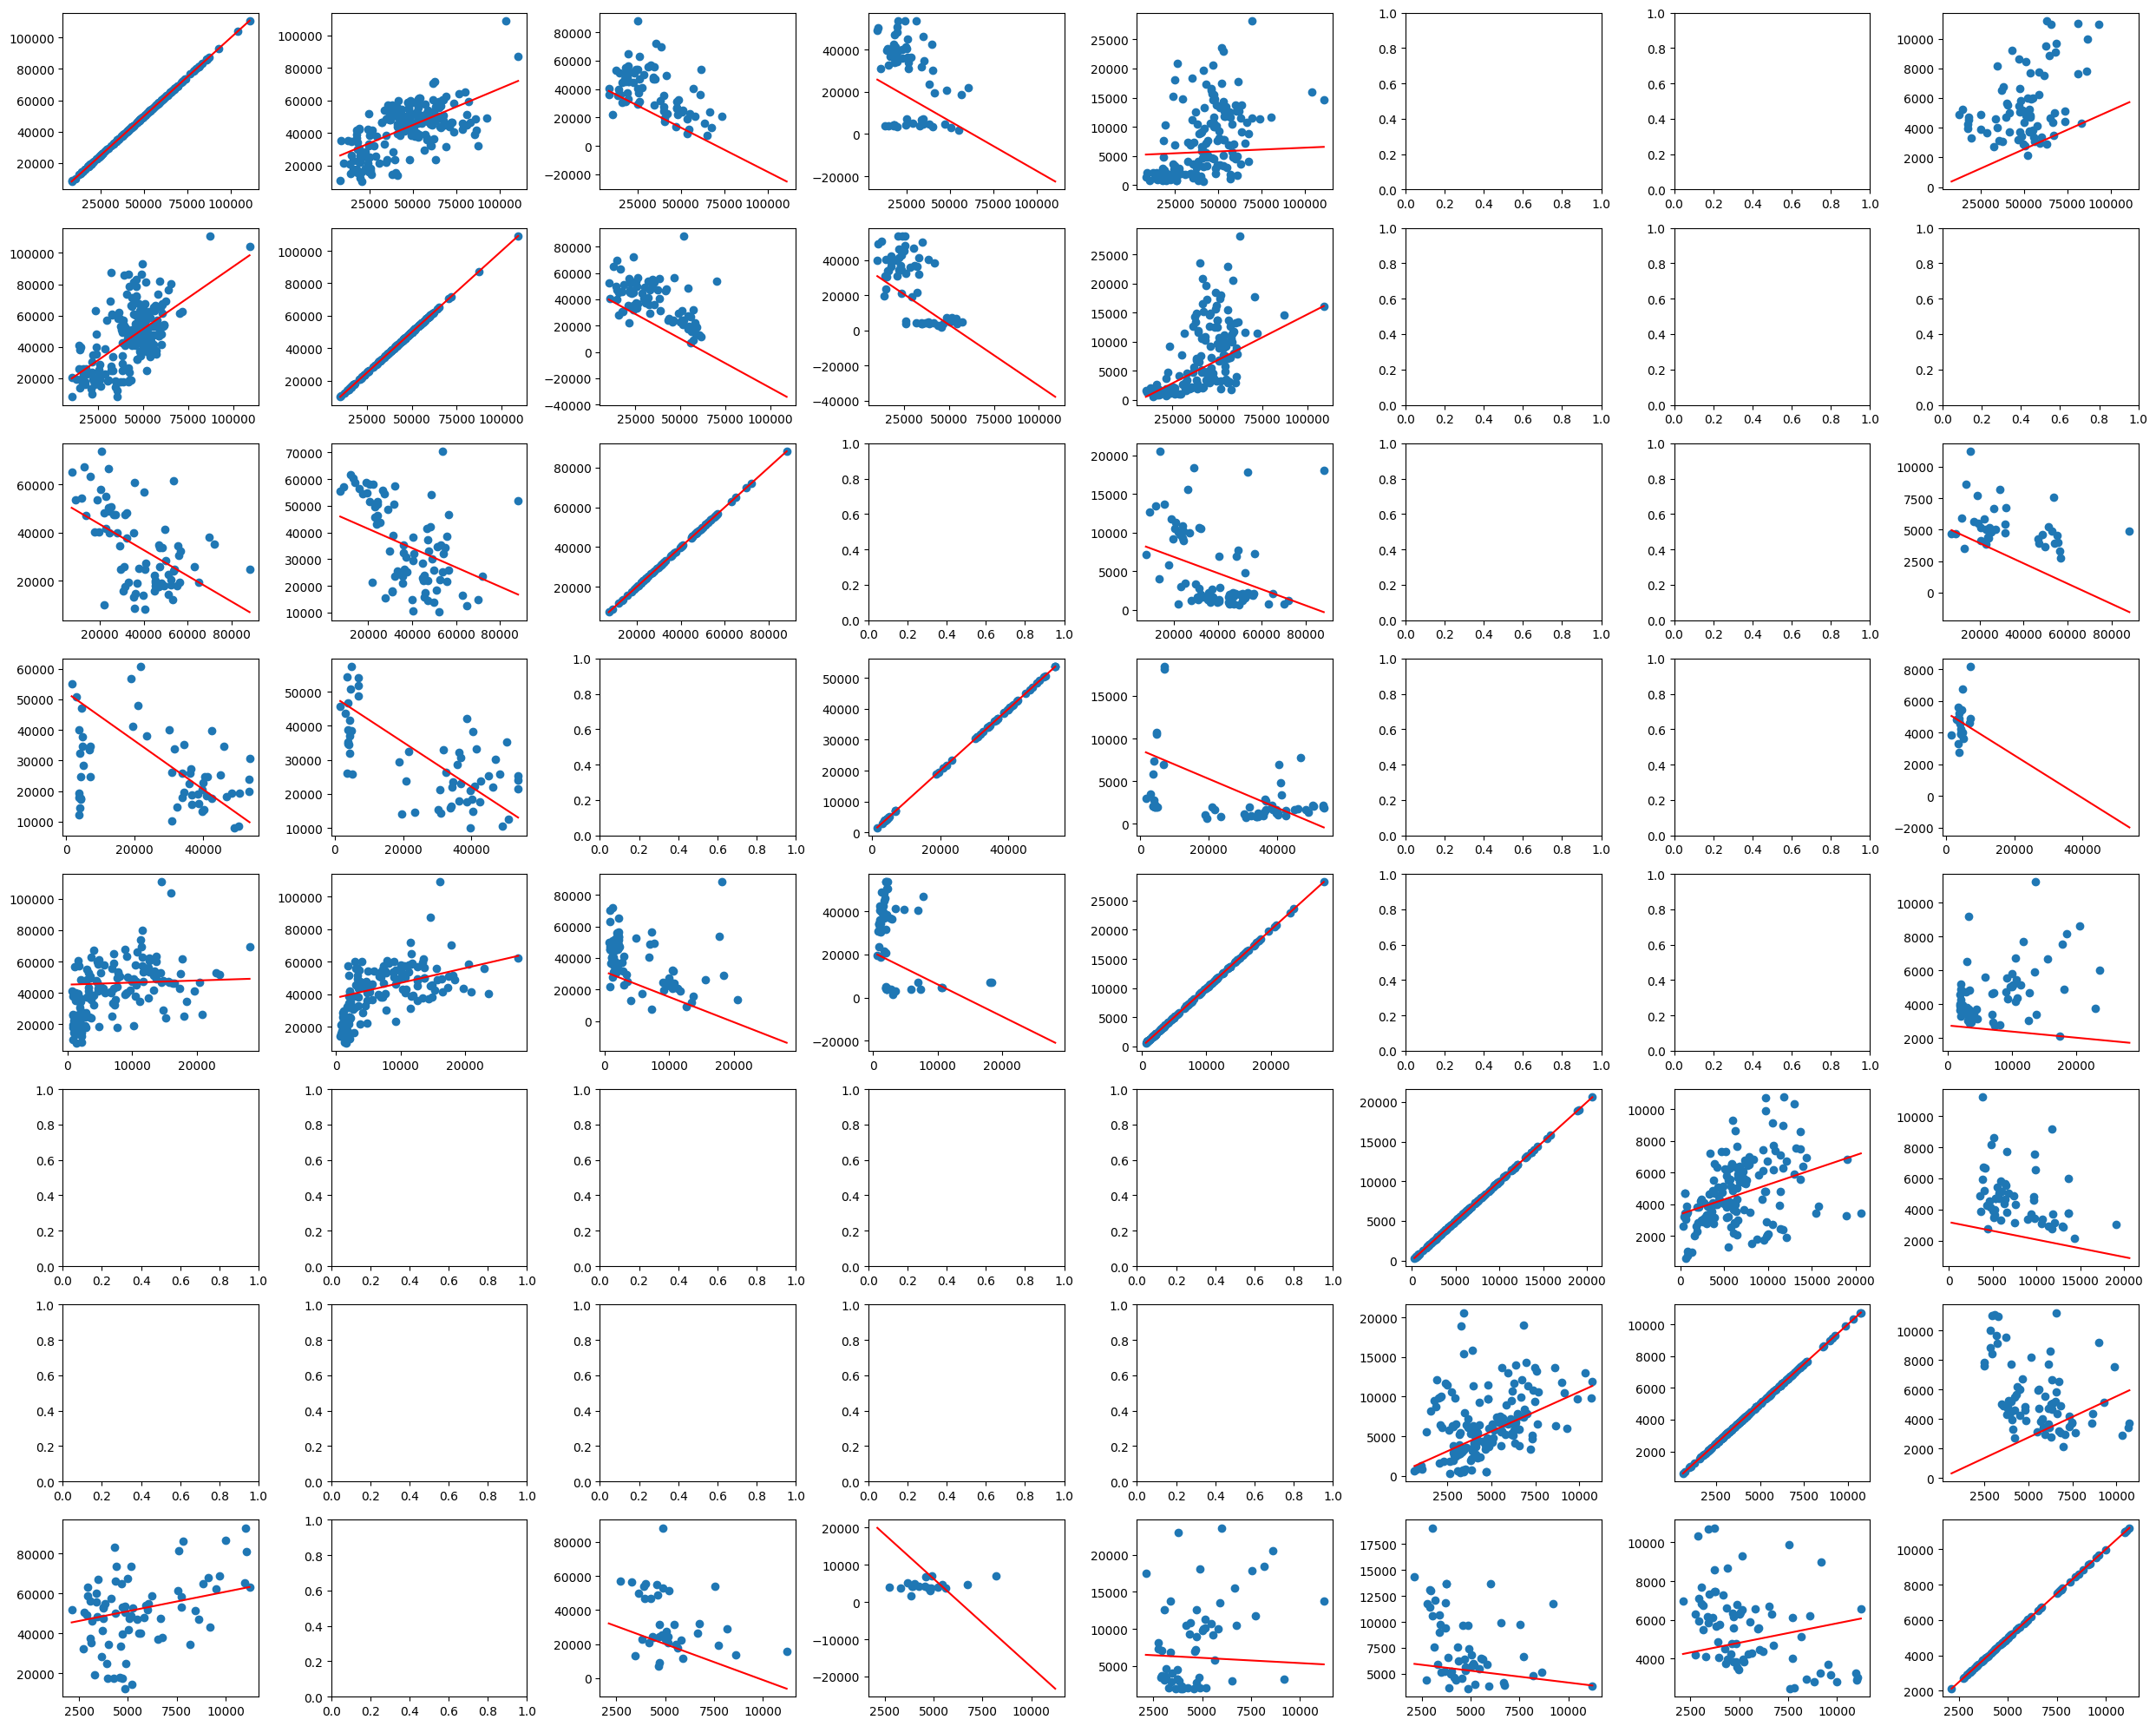

In [46]:
# Configura la disposición de subgráficos 5x4
filas = 8
columnas = 8
fig, axs = plt.subplots(filas, columnas, figsize=(25, 20))
x = df_distrito_jalisco_top_10.fillna(0)

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        if ~(df_distrito_jalisco_top_10_corr.iloc[i][j] <= .3 and df_distrito_jalisco_top_10_corr.iloc[i][j] >= -0.3):
            
            # Dividir el conjunto de datos en entrenamiento y prueba
             
            x_aj = x[(x[top_jal[i]] != 0) | (x[top_jal[j]] != 0)]


            X_train, X_test, y_train, y_test = train_test_split(x_aj[top_jal[i]].values.reshape(-1, 1), x_aj[top_jal[j]].values.reshape(-1, 1), test_size = 0.3, random_state=42)

            # Crear el modelo de regresión lineal
            regression_model = LinearRegression()

            # Entrenar el modelo con el conjunto de entrenamiento
            regression_model.fit(X_train, y_train)

            # Realizar predicciones en el conjunto de prueba
            y_pred = regression_model.predict(X_test)

            # Calcular el error cuadrático medio (MSE)
            mse = mean_squared_error(y_test, y_pred)

            # Calcular el coeficiente de determinación (R^2)
            r2 = r2_score(y_test, y_pred)

            x_modelo = np.linspace(df_distrito_jalisco_top_10[top_jal[i]].min(), df_distrito_jalisco_top_10[top_jal[i]].max(), 100)
            y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
            y_modelo = y_modelo.ravel()

        # Calcula el índice correspondiente al subgráfico actual
        # distrito = i * filas + j + 1

        # Grafica los datos en el subgráfico actual
            axs[i, j].plot(x_modelo, y_modelo, color='red')
            axs[i, j].scatter(df_distrito_jalisco_top_10[top_jal[i]], df_distrito_jalisco_top_10[top_jal[j]])

        # axs[i, j].set_title(f'Distrito {distrito}')
        #axs[i, j].legend()
        # axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
# fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
# fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
# fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

In [47]:
# Se hara una tabla pivote para analizar el número de votos por distrito a lo largo de los periodos

piv_distrito_jalisco = pd.pivot_table(df_distrito_jalisco, values = 'TOTAL_VOTOS', index = 'year', columns = 'ID_DISTRITO', aggfunc = 'sum')
piv_distrito_jalisco

ID_DISTRITO        1         2         3         4         5         6   \
year                                                                      
1994         41595.00 107088.00 170386.00  53194.00  89463.00 109956.00   
1997         88552.00 106455.00 109609.00 116335.00  94022.00 108491.00   
2000        101908.00 131880.00 131490.00 147187.00 117442.00 141914.00   
2003        110040.00 122082.00 127077.00 123858.00 116845.00 119646.00   
2006        139476.00 136858.00 147114.00 147933.00 136358.00 164733.00   
2009        154795.00 140487.00 146429.00 125056.00 147160.00 139074.00   
2012        171904.00 165159.00 171154.00 177744.00 181550.00 204416.00   
2015        171589.00 151891.00 156533.00 137249.00 168827.00 164912.00   
2018        172265.00 153426.00 185985.00 162186.00 156110.00 179321.00   
2021        170312.00 144972.00 171425.00 129722.00 141833.00 156249.00   

ID_DISTRITO        7         8         9         10        11        12  \
year                                                                      
1994        126869.00 124177.00 112636.00 110667.00  79227.00 105247.00   
1997        121739.00 121939.00 114269.00 104329.00 117615.00 123106.00   
2000        161777.00 145730.00 129553.00 139496.00 134517.00 144963.00   
2003        143804.00 119067.00 106951.00 111040.00 111062.00 116247.00   
2006        125849.00 180911.00 156894.00 155519.00 152847.00 154807.00   
2009        118228.00 141421.00 127938.00 123784.00 125477.00 163812.00   
2012        164106.00 174074.00 162027.00 183295.00 160617.00 259216.00   
2015        121566.00 140373.00 130098.00 140048.00 127732.00 227763.00   
2018        135778.00 218218.00 175891.00 181869.00 189931.00 174693.00   
2021        102478.00 184308.00 131189.00 159134.00 145095.00 142635.00   

ID_DISTRITO        13        14        15        16        17        18  \
year                                                                      
1994         46684.00  76020.00 173211.00 148642.00 158318.00 251593.00   
1997        119614.00 119686.00 114032.00 132921.00 119716.00 100284.00   
2000        137419.00 134871.00 135876.00 164116.00 143910.00 120835.00   
2003        111084.00 107793.00 130952.00 137132.00 144740.00 127248.00   
2006        170507.00 164919.00 142827.00 147163.00 148150.00 147644.00   
2009        136151.00 128935.00 145263.00 127687.00 160504.00 158145.00   
2012        172765.00 169552.00 166097.00 179388.00 180335.00 182481.00   
2015        137796.00 131911.00 151288.00 133276.00 177907.00 168040.00   
2018        169745.00 196797.00 178429.00 162344.00 159317.00 178328.00   
2021        134019.00 152803.00 162005.00 123100.00 157892.00 168197.00   

ID_DISTRITO        19        20  
year                             
1994         91476.00 228910.00  
1997        115619.00       NaN  
2000        133394.00       NaN  
2003        133200.00       NaN  
2006        152413.00       NaN  
2009        153083.00       NaN  
2012        175212.00       NaN  
2015        168285.00       NaN  
2018        187800.00 146107.00  
2021        171762.00 129105.00

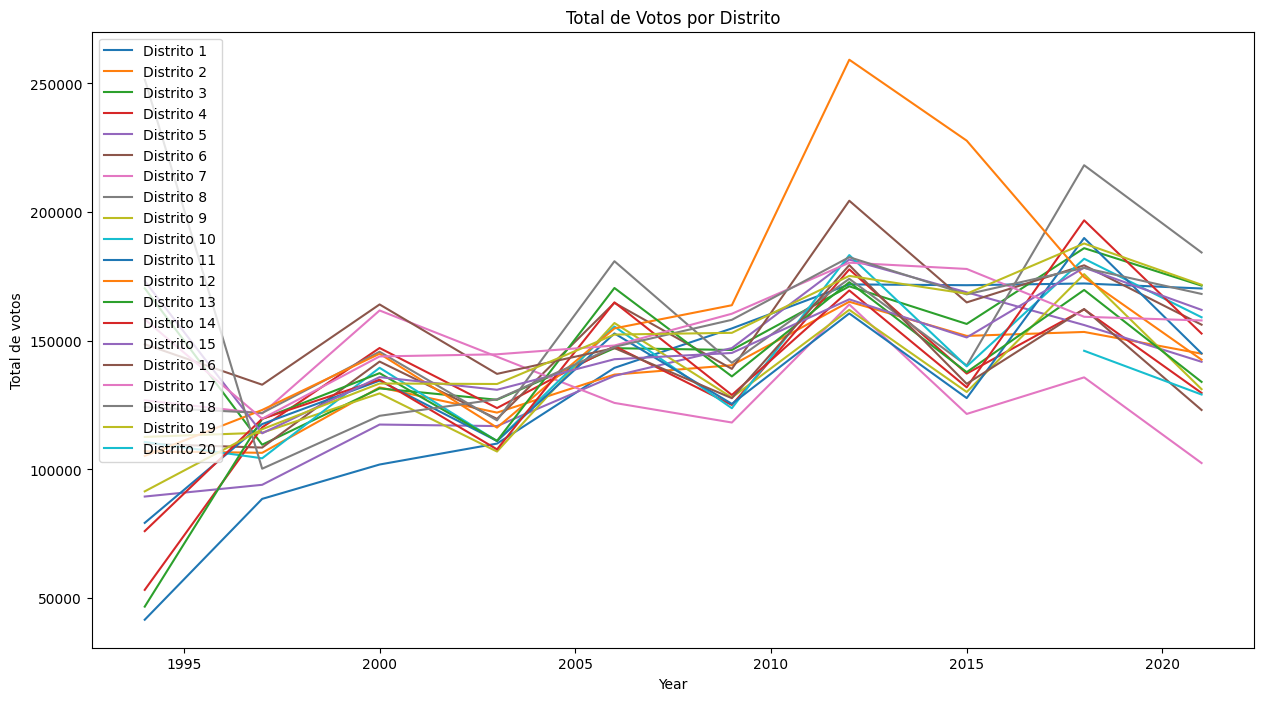

In [48]:
# La idea es graficar los votos recopilados en los diferentes distritos en los diferentes periodos. 

leyendas = []
plt.figure(figsize = (15, 8))
for columna in piv_distrito_jalisco.columns:
    plt.plot(piv_distrito_jalisco.index, piv_distrito_jalisco[columna])
    leyendas.append(f'Distrito {str(int(columna))}')
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.title('Total de Votos por Distrito')
plt.legend(leyendas)
plt.show()

In [49]:
# En la gráfica antererior podemos apreciar que el total de votos han aumentado en fucnion del tiempo en cada uno de los Distritos
# Para analizar más profundamente a cada Distrito podriamos analizar la distritubución de los votos en cada unos de los partidos en los diferentes Distritos
# Haremos multiples tablas pivot de los partido

name_piv_distrito_jalisco_partidos = []
for partido in list(top_10_jalisco):
     name_piv_distrito_jalisco_partidos.append(f'pivot_{partido}')
print(name_piv_distrito_jalisco_partidos)

# NOTA. planeaba elaborar varias tablas pivot individuales, pero al final opte por hacer diccionarios, lo cual esta mejor, por lo que no necesote
# la variable "name_piv_distrito_jalisco_partidos"

['pivot_PAN', 'pivot_PRI', 'pivot_MC', 'pivot_MORENA', 'pivot_AC', 'pivot_PRD', 'pivot_PVEM', 'pivot_APM', 'pivot_NUM_VOTOS_NULOS', 'pivot_NVA_ALIANZA']


In [50]:
# Ahora que establecimos los nombres de las tablas pivot, vamos a ingresar los datos de cada una

tablas_pivote_jalisco_distrito = {}
for i, nombre_tabla_pivot in enumerate(top_10_jalisco):
    tablas_pivote_jalisco_distrito[nombre_tabla_pivot] = pd.pivot_table(df_distrito_jalisco, values = list(top_10_jalisco)[i], index = 'year', columns = 'ID_DISTRITO', aggfunc = 'sum')
tablas_pivote_jalisco_distrito.keys()

dict_keys(['PAN', 'PRI', 'MC', 'MORENA', 'AC', 'PRD', 'PVEM', 'APM', 'NUM_VOTOS_NULOS', 'NVA_ALIANZA'])

In [51]:
# Se puede analizar el pivot de cada partido en el diccionario
tablas_pivote_jalisco_distrito['PRD'].head()

ID_DISTRITO       1       2        3        4        5        6        7   \
year                                                                        
1994         1895.00 7652.00 11627.00  3645.00  4103.00  1926.00  1821.00   
1997        14844.00 7195.00  4747.00 16535.00  6598.00 10653.00 14577.00   
2000            0.00    0.00     0.00     0.00     0.00     0.00     0.00   
2003        12535.00 4755.00  4909.00  7643.00 11184.00  4954.00  7861.00   
2006            0.00    0.00     0.00     0.00     0.00     0.00     0.00   

ID_DISTRITO       8        9       10       11       12       13       14  \
year                                                                        
1994        13337.00  7367.00 8869.00 10299.00  6678.00  2713.00  4094.00   
1997        12641.00 13367.00 9202.00 11864.00 11470.00 11606.00 14373.00   
2000            0.00     0.00    0.00     0.00     0.00     0.00     0.00   
2003         5152.00  4681.00 4572.00  5537.00  5643.00  4821.00  5161.00   
2006            0.00     0.00    0.00     0.00     0.00     0.00     0.00   

ID_DISTRITO       15       16       17       18       19       20  
year                                                               
1994        28219.00  8891.00 11536.00 16044.00 15219.00 14586.00  
1997        17321.00 12640.00 14858.00 20890.00 19705.00      NaN  
2000            0.00     0.00     0.00     0.00     0.00      NaN  
2003        13732.00  7775.00 15726.00 16328.00 11701.00      NaN  
2006            0.00     0.00     0.00     0.00     0.00      NaN

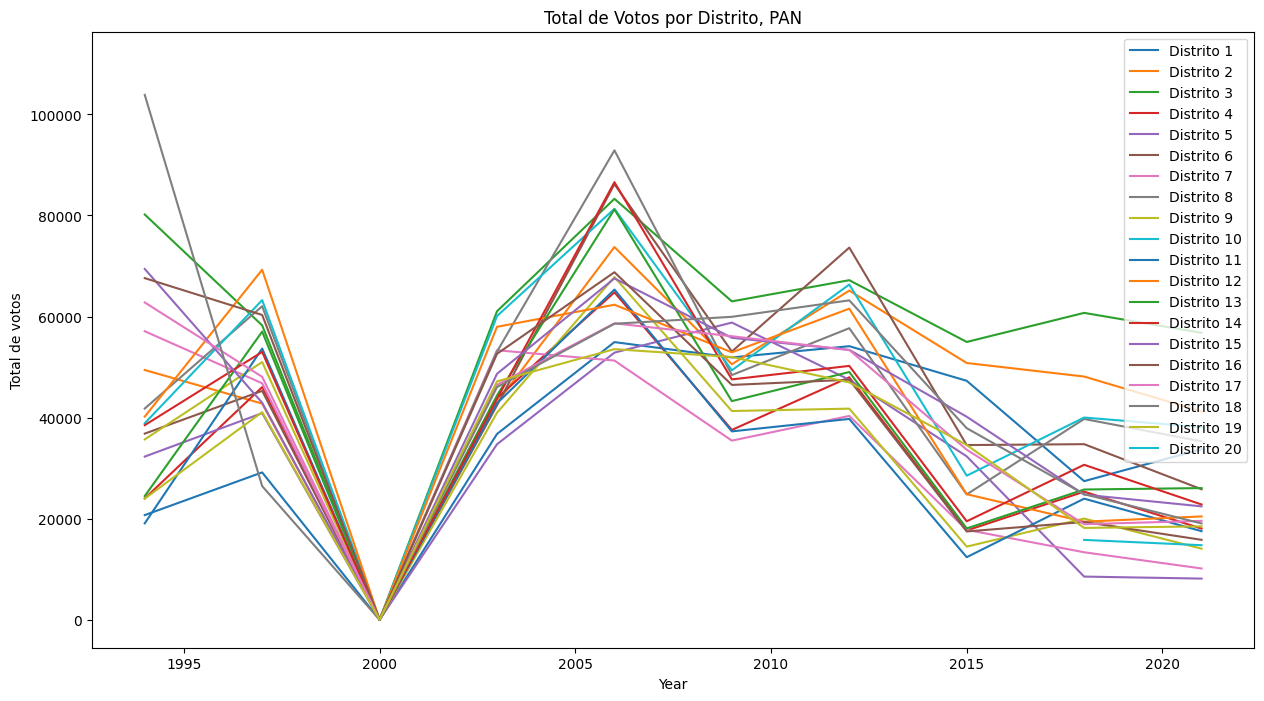

In [52]:
# Ahora podemos graficar los votos obtenidos para cada partido en cada distrito, podemos empezar con el PAN

leyendas = []
plt.figure(figsize = (15, 8))
for columna in tablas_pivote_jalisco_distrito['PAN'].columns:
    plt.plot(tablas_pivote_jalisco_distrito['PAN'].index, tablas_pivote_jalisco_distrito['PAN'][columna])
    leyendas.append(f'Distrito {str(int(columna))}')
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.title('Total de Votos por Distrito, PAN')
plt.legend(leyendas)
plt.show()


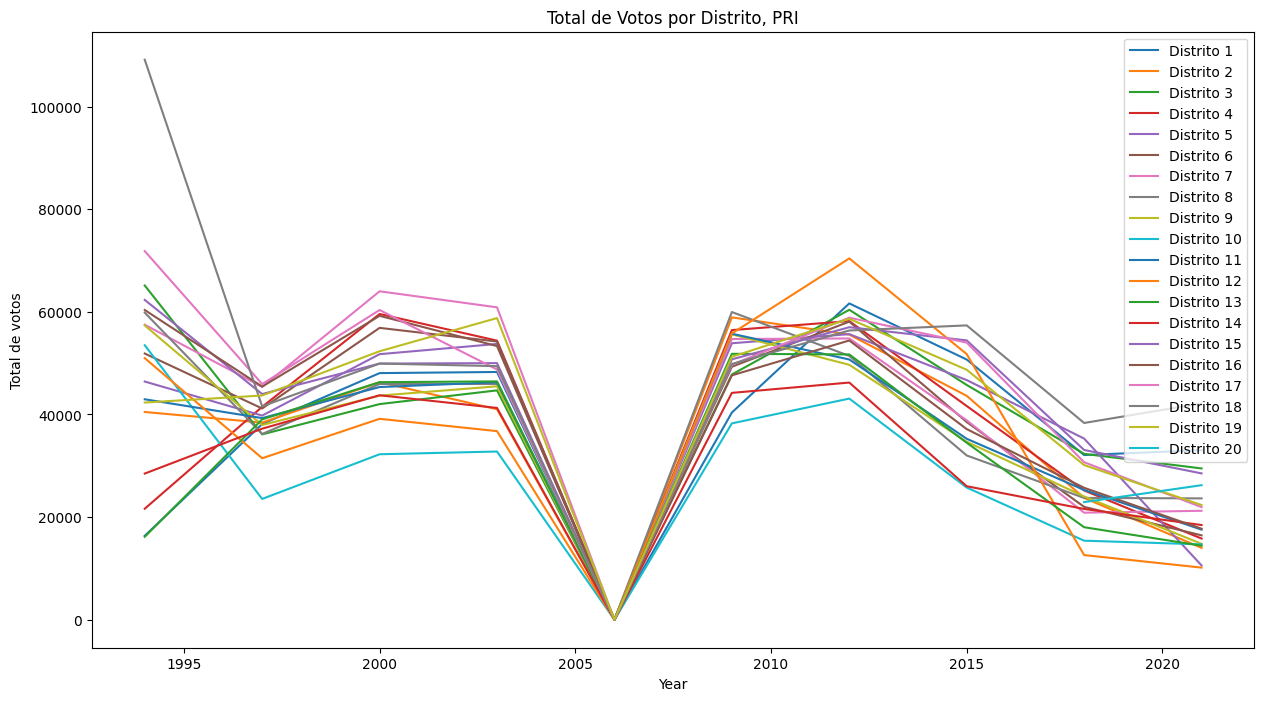

In [53]:
# Ahora podemos graficar los votos obtenidos para cada partido en cada distrito, podemos empezar con el PAN

leyendas = []
plt.figure(figsize = (15, 8))
for columna in tablas_pivote_jalisco_distrito['PRI'].columns:
    plt.plot(tablas_pivote_jalisco_distrito['PRI'].index, tablas_pivote_jalisco_distrito['PRI'][columna])
    leyendas.append(f'Distrito {str(int(columna))}')
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.title('Total de Votos por Distrito, PRI')
plt.legend(leyendas)
plt.show()

In [54]:
# Para analizar el impacto de los votos obtenidos en cada partido, podemos normalizar la información en función de los votos totales
# de cada distrito con la tabla pivot "piv_distrito_jalisco". 

tablas_pivote_jalisco_distrito_norm = {}
for partido in top_10_jalisco:
    tablas_pivote_jalisco_distrito_norm[partido] = tablas_pivote_jalisco_distrito[partido] / piv_distrito_jalisco
tablas_pivote_jalisco_distrito_norm['PRI']

ID_DISTRITO   1    2    3    4    5    6    7    8    9    10   11   12   13  \
year                                                                           
1994        0.39 0.38 0.38 0.41 0.52 0.47 0.45 0.48 0.51 0.48 0.54 0.48 0.35   
1997        0.43 0.36 0.33 0.36 0.42 0.38 0.37 0.30 0.33 0.23 0.33 0.26 0.33   
2000        0.47 0.35 0.32 0.40 0.44 0.40 0.40 0.32 0.34 0.23 0.34 0.27 0.34   
2003        0.44 0.34 0.35 0.44 0.46 0.45 0.42 0.39 0.43 0.30 0.42 0.32 0.42   
2006        0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2009        0.26 0.42 0.33 0.45 0.37 0.35 0.46 0.42 0.43 0.31 0.44 0.34 0.38   
2012        0.36 0.34 0.35 0.33 0.31 0.28 0.33 0.30 0.31 0.24 0.32 0.27 0.30   
2015        0.30 0.29 0.29 0.30 0.28 0.23 0.32 0.23 0.27 0.18 0.28 0.23 0.25   
2018        0.19 0.15 0.17 0.16 0.23 0.12 0.15 0.11 0.14 0.08 0.13 0.07 0.11   
2021        0.19 0.10 0.17 0.12 0.07 0.11 0.21 0.13 0.11 0.09 0.12 0.07 0.11   

ID_DISTRITO   14   15   16   17   18   19   20  
year                                            
1994        0.37 0.36 0.41 0.45 0.43 0.46 0.38  
1997        0.31 0.39 0.34 0.38 0.41 0.38  NaN  
2000        0.32 0.37 0.36 0.42 0.41 0.39  NaN  
2003        0.38 0.38 0.39 0.34 0.39 0.44  NaN  
2006        0.00 0.00 0.00 0.00 0.00 0.00  NaN  
2009        0.34 0.35 0.37 0.31 0.32 0.33  NaN  
2012        0.27 0.34 0.30 0.33 0.31 0.33  NaN  
2015        0.20 0.36 0.28 0.30 0.34 0.29  NaN  
2018        0.11 0.19 0.16 0.19 0.22 0.16 0.16  
2021        0.12 0.18 0.14 0.14 0.25 0.13 0.20

In [55]:
# Eliminando el periodo donde no hubo participación, podemos obtener la descripción de los datos en cada distrito. Lo que me gustaria denotar
# es impacto menor y mayor en los distritos para el partido, en este caso, el "PRI"
tablas_pivote_jalisco_distrito_norm['PRI'].drop(2006).describe()

ID_DISTRITO   1    2    3    4    5    6    7    8    9    10   11   12   13  \
count       9.00 9.00 9.00 9.00 9.00 9.00 9.00 9.00 9.00 9.00 9.00 9.00 9.00   
mean        0.34 0.30 0.30 0.33 0.34 0.31 0.35 0.30 0.32 0.24 0.32 0.26 0.29   
std         0.11 0.11 0.08 0.12 0.14 0.13 0.11 0.13 0.13 0.12 0.14 0.13 0.11   
min         0.19 0.10 0.17 0.12 0.07 0.11 0.15 0.11 0.11 0.08 0.12 0.07 0.11   
25%         0.26 0.29 0.29 0.30 0.28 0.23 0.32 0.23 0.27 0.18 0.28 0.23 0.25   
50%         0.36 0.34 0.33 0.36 0.37 0.35 0.37 0.30 0.33 0.23 0.33 0.27 0.33   
75%         0.43 0.36 0.35 0.41 0.44 0.40 0.42 0.39 0.43 0.30 0.42 0.32 0.35   
max         0.47 0.42 0.38 0.45 0.52 0.47 0.46 0.48 0.51 0.48 0.54 0.48 0.42   

ID_DISTRITO   14   15   16   17   18   19   20  
count       9.00 9.00 9.00 9.00 9.00 9.00 3.00  
mean        0.27 0.32 0.31 0.32 0.34 0.32 0.25  
std         0.10 0.08 0.10 0.10 0.08 0.12 0.12  
min         0.11 0.18 0.14 0.14 0.22 0.13 0.16  
25%         0.20 0.34 0.28 0.30 0.31 0.29 0.18  
50%         0.31 0.36 0.34 0.33 0.34 0.33 0.20  
75%         0.34 0.37 0.37 0.38 0.41 0.39 0.29  
max         0.38 0.39 0.41 0.45 0.43 0.46 0.38

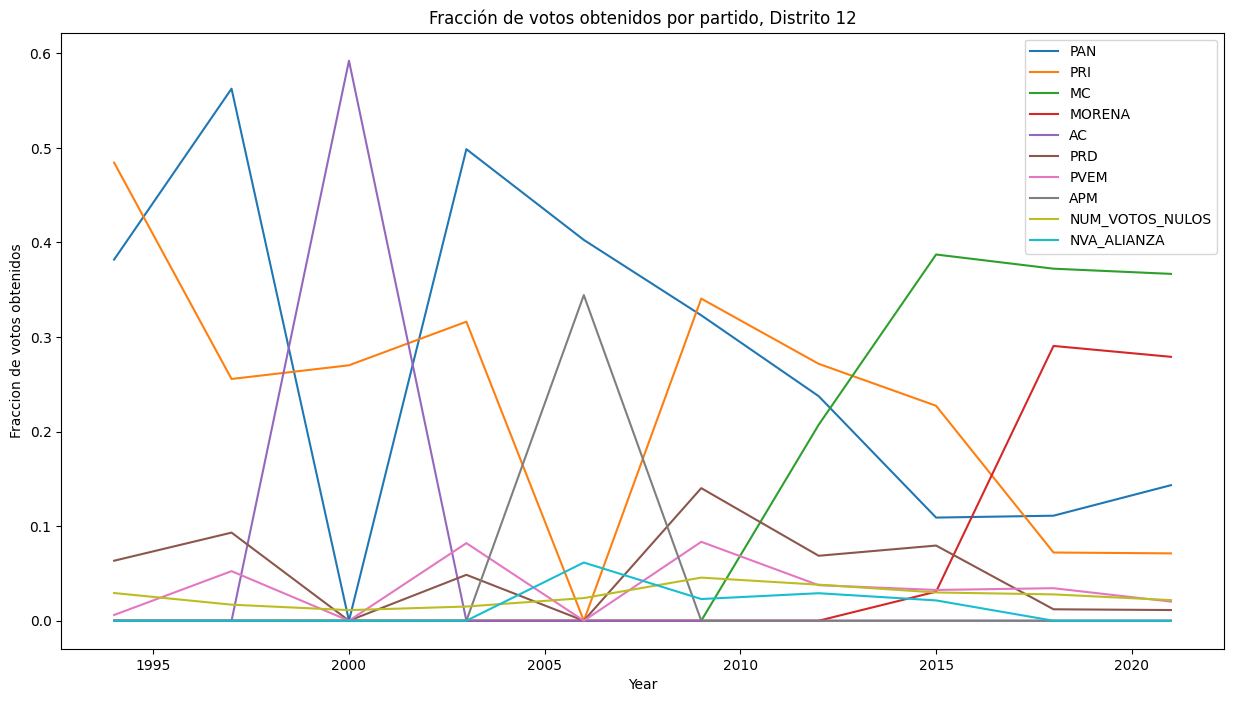

In [56]:
# Ahora podemos gráficar el impacto de cada partido en los diferentes distritos y en los diferentes periodos

leyendas = []
distrito = 12     # Distrito a analizar
plt.figure(figsize = (15, 8))
for partido in top_10_jalisco:
    plt.plot(tablas_pivote_jalisco_distrito_norm[partido].index, tablas_pivote_jalisco_distrito_norm[partido][distrito])  
    leyendas.append(partido)
plt.xlabel('Year')
plt.ylabel('Fraccion de votos obtenidos')
plt.title(f'Fracción de votos obtenidos por partido, Distrito {str(distrito)}')
plt.legend(leyendas)
plt.show()

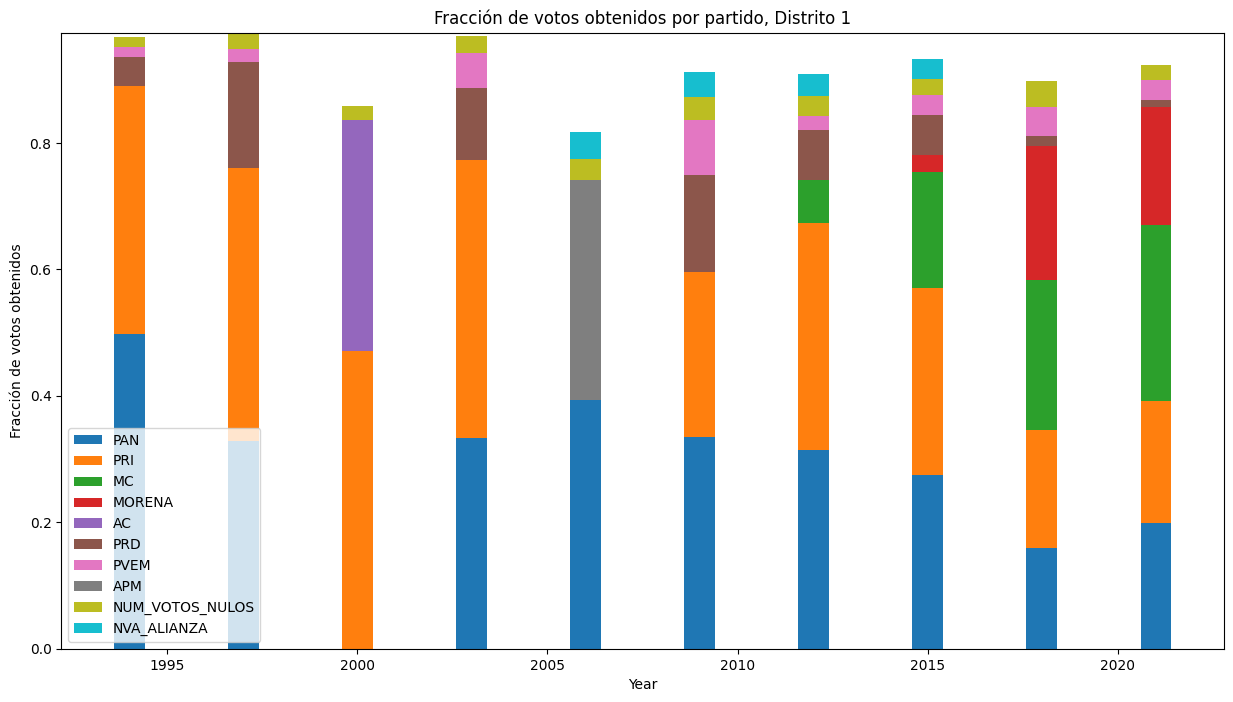

In [57]:
# Se puede implementar una gráfica de barras apiladas para una mejor visualización de los datos

leyendas = []
distrito = 1     # Distrito a analizar
plt.figure(figsize=(15, 8))

bottom = np.zeros(len(tablas_pivote_jalisco_distrito_norm[partido].index))
for partido in top_10_jalisco:
    plt.bar(
        tablas_pivote_jalisco_distrito_norm[partido].index,
        tablas_pivote_jalisco_distrito_norm[partido][distrito],
        bottom = bottom,
        label = partido
    )
    bottom += np.array(tablas_pivote_jalisco_distrito_norm[partido][distrito])
    leyendas.append(partido)

plt.xlabel('Year')
plt.ylabel('Fracción de votos obtenidos')
plt.title(f'Fracción de votos obtenidos por partido, Distrito {str(distrito)}')
plt.legend(leyendas)
plt.show()

In [58]:
tablas_pivote_jalisco_distrito_norm.keys()

dict_keys(['PAN', 'PRI', 'MC', 'MORENA', 'AC', 'PRD', 'PVEM', 'APM', 'NUM_VOTOS_NULOS', 'NVA_ALIANZA'])

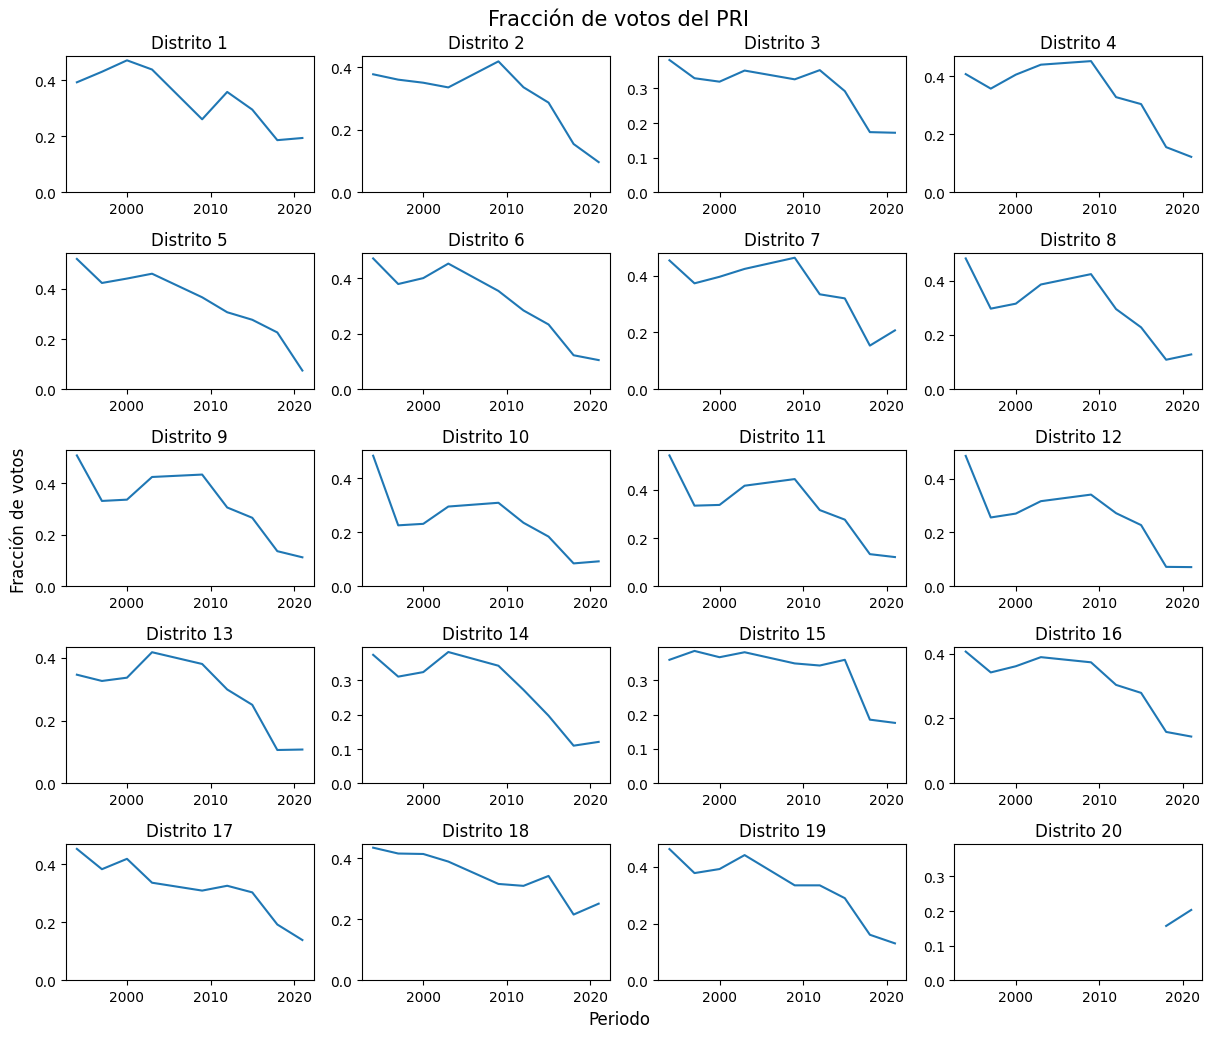

In [59]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'
x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1

        # Grafica los datos en el subgráfico actual
        axs[i, j].plot(x.index, x[distrito], label=f'Gráfica {distrito}')
        axs[i, j].set_title(f'Distrito {distrito}')
        #axs[i, j].legend()
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

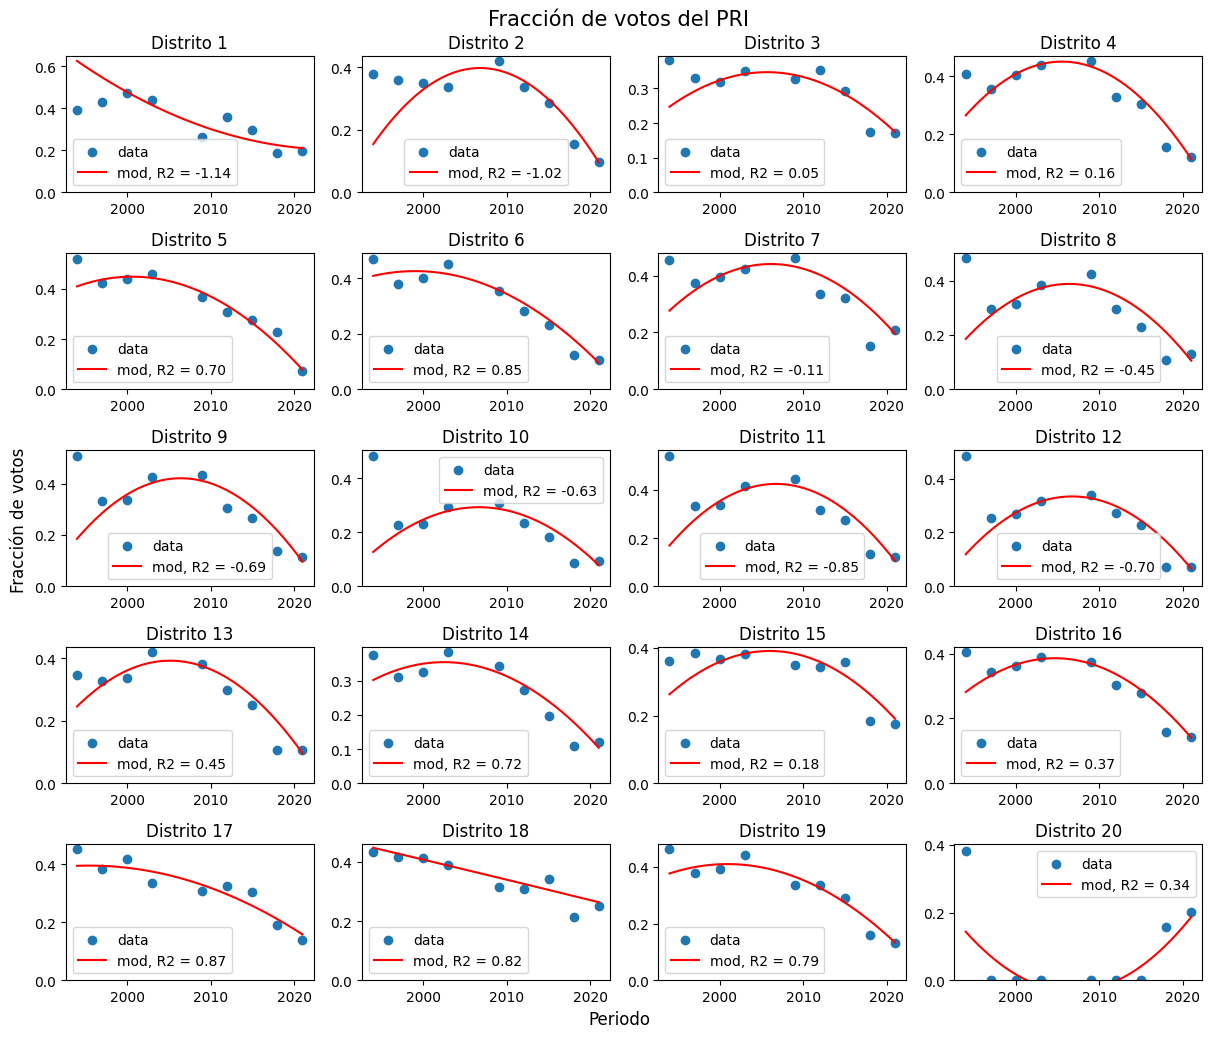

In [90]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron

x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]
x.fillna(0, inplace = True)

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        y = x[distrito]

        # Grafica los datos en el subgráfico actual
        axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')

        # MODELO DE REGRESION LINEAL ############################################################################################################
        '''
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.5, random_state=42)

        # Crear el modelo de regresión lineal
        regression_model = LinearRegression()

        # Entrenar el modelo con el conjunto de entrenamiento
        regression_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = regression_model.predict(X_test)

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)
        '''
        # MODELO DE REGRESIÓN POLINOMIAL ##########################################################################################################
        
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        poly_features = PolynomialFeatures(degree = 2)
        X_poly = poly_features.fit_transform(X_train)
        poly_model = LinearRegression()

        # Entrenar el modelo polinomial
        poly_model.fit(X_poly, y_train)

        # Realizar predicciones en el conjunto de prueba
        X_test_poly = poly_features.transform(X_test)
        y_pred = poly_model.predict(X_test_poly)

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = poly_model.coef_[0][2] * x_modelo**2 + poly_model.coef_[0][1] * x_modelo + poly_model.intercept_
        y_modelo = y_modelo.ravel()

        axs[i, j].plot(x_modelo, y_modelo, color='red')

        axs[i, j].set_title(f'Distrito {distrito}')
        axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

PAN
PRI
MC
MORENA
PRD
PVEM
NUM_VOTOS_NULOS
NVA_ALIANZA
R2_prom = -54.01723035592967


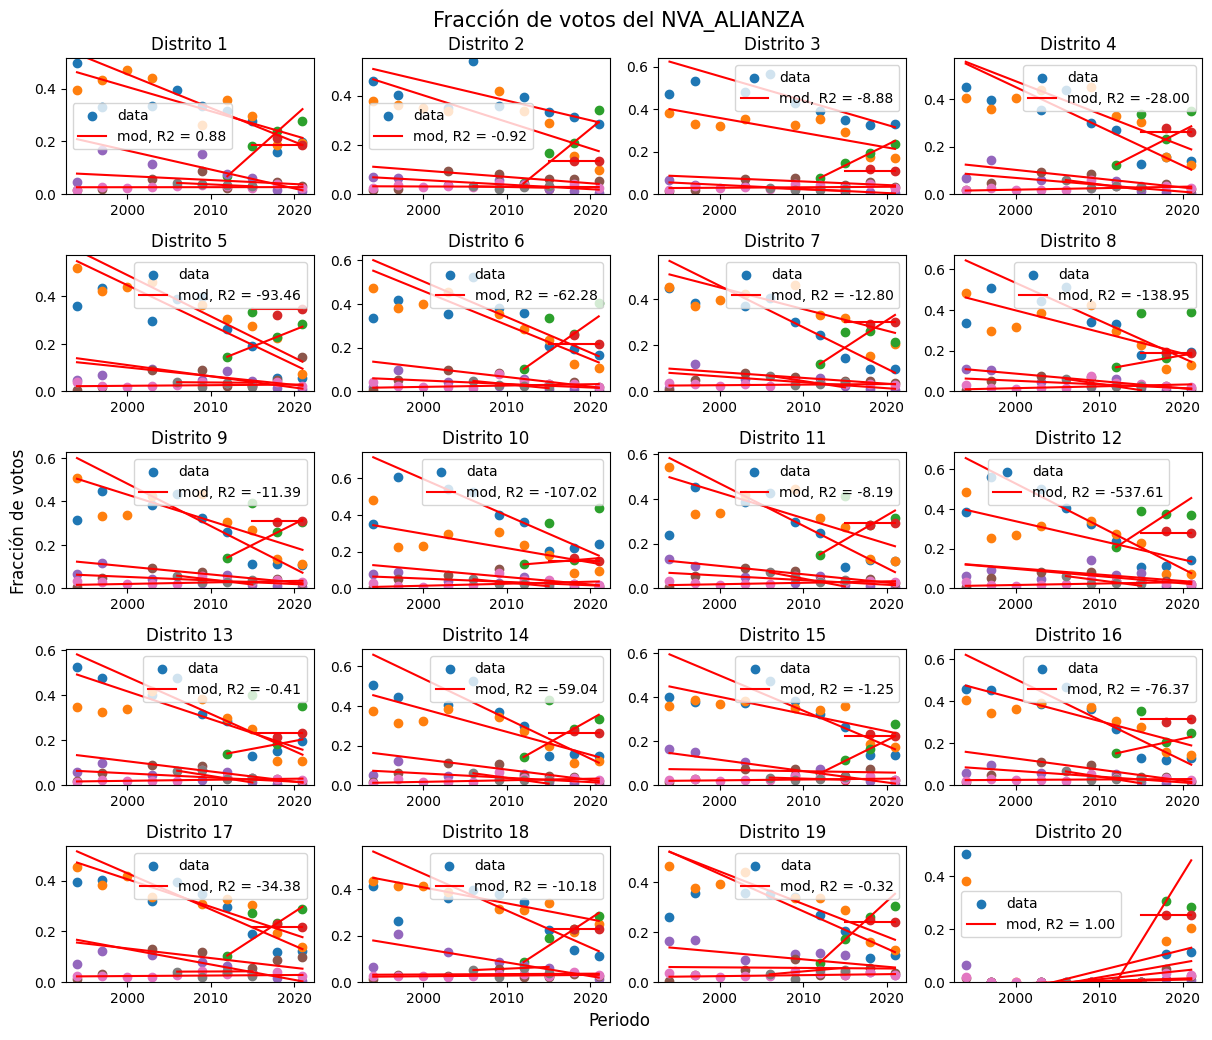

In [61]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
#partido = 'PRI'
r2_sum = []

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron

for partido in top_10_jalisco:
    if partido == 'AC' or partido =='APM': 
        continue
    print(partido)
    x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]
    x.fillna(0, inplace = True)
    
    # Itera sobre los subgráficos y grafica los datos de ejemplo
    for i in range(filas):
        for j in range(columnas):
            # Calcula el índice correspondiente al subgráfico actual
            distrito = i * 4 + j + 1
            y = x[distrito]
    
            # Grafica los datos en el subgráfico actual
            axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')
    
            # MODELO DE REGRESION LINEAL ############################################################################################################
            
            # Dividir el conjunto de datos en entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)
    
            # Crear el modelo de regresión lineal
            regression_model = LinearRegression()
    
            # Entrenar el modelo con el conjunto de entrenamiento
            regression_model.fit(X_train, y_train)
    
            # Realizar predicciones en el conjunto de prueba
            y_pred = regression_model.predict(X_test)
    
            # Calcular el error cuadrático medio (MSE)
            mse = mean_squared_error(y_test, y_pred)
    
            # Calcular el coeficiente de determinación (R^2)
            r2 = r2_score(y_test, y_pred)
            r2_sum.append(r2)
    
            x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
            y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
            y_modelo = y_modelo.ravel()
            
            # MODELO DE REGRESIÓN POLINOMIAL ##########################################################################################################
            '''
            # Dividir el conjunto de datos en entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)
    
            # Crear el modelo de regresión lineal
            poly_features = PolynomialFeatures(degree=2)
            X_poly = poly_features.fit_transform(X_train)
            poly_model = LinearRegression()
    
            # Entrenar el modelo polinomial
            poly_model.fit(X_poly, y_train)
    
            # Realizar predicciones en el conjunto de prueba
            X_test_poly = poly_features.transform(X_test)
            y_pred = poly_model.predict(X_test_poly)
    
            # Calcular el error cuadrático medio (MSE)
            mse = mean_squared_error(y_test, y_pred)
    
            # Calcular el coeficiente de determinación (R^2)
            r2 = r2_score(y_test, y_pred)
    
            x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
            y_modelo = poly_model.coef_[0][2] * x_modelo**2 + poly_model.coef_[0][1] * x_modelo + poly_model.intercept_
            y_modelo = y_modelo.ravel()
            '''
            #########################################################################################################################################
            
            axs[i, j].plot(x_modelo, y_modelo, color='red')
    
            axs[i, j].set_title(f'Distrito {distrito}')
            axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
            axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
R2_LinearRegression = np.mean(r2_sum)
print(f'R2_prom = {R2_LinearRegression}')

fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

In [62]:
top_10_jalisco[0]

'PAN'

In [63]:
# Se van a probar diferentes modelos de regresión con la libreria Lazy

partido = 'PRI'
modelos = {}

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron

x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]

# Sustituimos los valores NaN con 0
x.fillna(0, inplace = True)

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        y = x[distrito]

        # PRUEBA DE DIFERENTES MODELOS CON LAZYREGRESSOR ############################################################################################################
        
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Inicializa LazyRegressor
        rlf = LazyRegressor(predictions=True)

        # Ajusta el modelo y obtén los resultados
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        models = rlf.fit(X_train, X_test, y_train, y_test)
        modelos[f'distrito {distrito}'] = models

 19%|█▉        | 8/42 [00:00<00:00, 41.92it/s]  File "c:\Users\Ccris\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
100%|██████████| 42/42 [00:00<00:00, 42.83it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.332187
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 58.86it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.298104
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 58.68it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.292413
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 57.73it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.344179
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 63.68it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.323636
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 56.80it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.309498
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 63.81it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.361748
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 60.33it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.296327
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 53.63it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.315327
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 60.63it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.222366
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 48.39it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.319069
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 61.10it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.245096
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 54.27it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.298750
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 60.01it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.273651
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 63.18it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.326918
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 65.28it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.309154
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 61.85it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.301761
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 59.01it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.341761
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 50.52it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.317615
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

100%|██████████| 42/42 [00:00<00:00, 65.97it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 0.040621
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

In [64]:
# Para definir el modelo que, en promedio describe mejor los datos, podemos promediar los resultados de cada distrito y mostrar el top 5 de los
# mejores modelos

sum_mod = modelos['distrito 1'][0]
for i in range(len(modelos.keys())-2):
    sum_mod += modelos[f'distrito {i+2}'][0]
mean_mod = sum_mod / (len(modelos.keys())-1)
mean_mod.sort_values('R-Squared', ascending = False).head()

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                 
ExtraTreeRegressor                   0.57       0.71  0.06        0.01
ExtraTreesRegressor                  0.55       0.70  0.06        0.07
GammaRegressor                       0.38       0.59  0.07        0.02
RandomForestRegressor                0.38       0.59  0.07        0.09
Ridge                                0.33       0.56  0.07        0.01

In [83]:
modelos['distrito 17'][0]

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.87       0.91  0.03        0.06
Ridge                                        0.82       0.88  0.03        0.01
BayesianRidge                                0.78       0.85  0.04        0.01
ExtraTreeRegressor                           0.76       0.84  0.04        0.01
RidgeCV                                      0.76       0.84  0.04        0.01
ElasticNetCV                                 0.75       0.83  0.04        0.06
LassoCV                                      0.75       0.83  0.04        0.06
Lars                                         0.74       0.83  0.04        0.01
OrthogonalMatchingPursuit                    0.74       0.83  0.04        0.01
LassoLarsIC                                  0.74       0.83  0.04        0.01
LassoLarsCV                                  0.74       0.83  0.04        0.01
LarsCV                                       0.74       0.83  0.04        0.01
TransformedTargetRegressor                   0.74       0.83  0.04        0.01
LinearRegression                             0.74       0.83  0.04        0.01
NuSVR                                        0.72       0.82  0.04        0.01
HuberRegressor                               0.67       0.78  0.04        0.01
GammaRegressor                               0.64       0.76  0.05        0.01
RandomForestRegressor                        0.61       0.74  0.05        0.09
TweedieRegressor                             0.59       0.72  0.05        0.01
BaggingRegressor                             0.56       0.71  0.05        0.02
LinearSVR                                    0.49       0.66  0.06        0.01
GaussianProcessRegressor                     0.48       0.65  0.06        0.01
RANSACRegressor                              0.47       0.64  0.06        0.01
XGBRegressor                                 0.39       0.59  0.06        0.03
AdaBoostRegressor                            0.38       0.58  0.06        0.06
DecisionTreeRegressor                        0.38       0.58  0.06        0.00
GradientBoostingRegressor                    0.38       0.58  0.06        0.04
PassiveAggressiveRegressor                   0.11       0.41  0.07        0.00
PoissonRegressor                             0.05       0.36  0.08        0.01
SVR                                         -0.38       0.08  0.09        0.01
LassoLars                                   -0.73      -0.15  0.10        0.01
Lasso                                       -0.73      -0.15  0.10        0.01
KNeighborsRegressor                         -0.73      -0.15  0.10        0.01
HistGradientBoostingRegressor               -0.73      -0.15  0.10        0.02
ElasticNet                                  -0.73      -0.15  0.10        0.01
DummyRegressor                              -0.73      -0.15  0.10        0.01
LGBMRegressor                               -0.73      -0.15  0.10        0.01
MLPRegressor                                -2.42      -1.28  0.14        0.03
SGDRegressor                                -8.07      -5.05  0.24        0.01
KernelRidge                                -13.84      -8.89  0.30        0.01

R2_prom = 0.6713095701925231


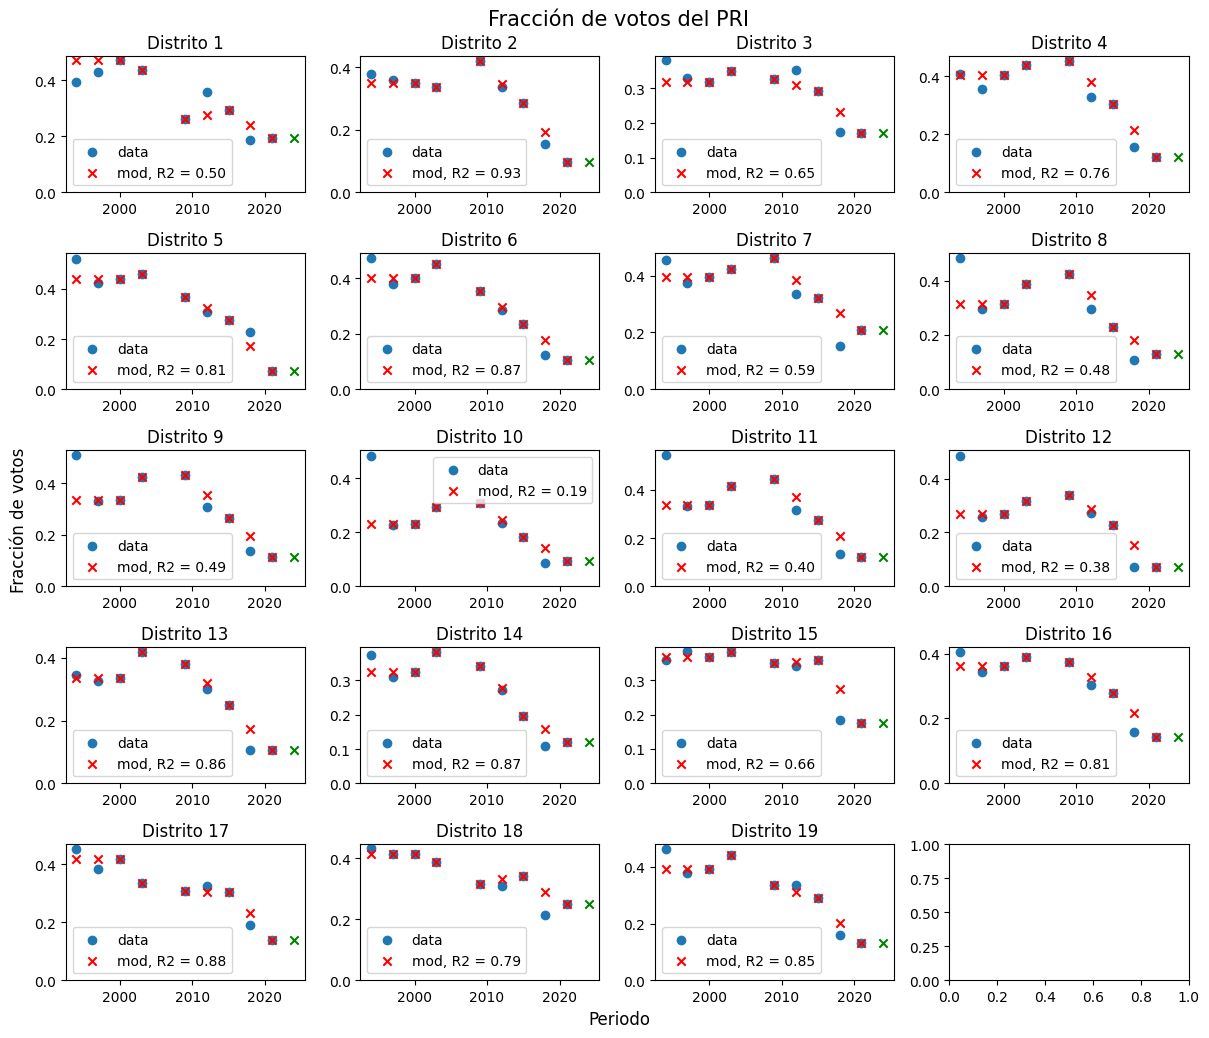

In [95]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'
r2_sum = []
count = []

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron
'''
for partido in top_10_jalisco:
    if partido == 'AC' or partido =='APM' or partido == 'NVA_ALIANZA': 
        continue
    dimensiones = tablas_pivote_jalisco_distrito_norm[partido].shape
    ceros_por_columna = tablas_pivote_jalisco_distrito_norm[partido].eq(np.nan).sum()
    ceros_por_df = np.sum(ceros_por_columna)
    fraccion_nan = ceros_por_df / dimensiones[0]*dimensiones[1]
    print(f'El {partido} contiene {fraccion_nan * 100}% de NaN')
    
    x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]
    x.fillna(0, inplace = True)
'''
# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        if distrito == 20:
            continue
        y = x[distrito]

        # Grafica los datos en el subgráfico actual
        axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')

        # MODELO DE REGRESION LINEAL ############################################################################################################
        
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)
        
        # Crear el modelo de regresión lineal
        regression_model = ExtraTreesRegressor()
        
        # Entrenar el modelo con el conjunto de entrenamiento
        regression_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = regression_model.predict(X_test)
        y_pred_t = regression_model.predict(x.index.values.reshape(-1, 1))

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)
        if r2 >= -5:
            r2_sum.append(r2)

        #x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        #y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
        #y_modelo = y_modelo.ravel()
        
        #########################################################################################################################################

        axs[i, j].scatter(x.index.values.reshape(-1, 1), y_pred_t, color='red', marker = 'x')

        pred_2024 = regression_model.predict(np.array([[2024]]))
        axs[i, j].scatter(np.array([[2024]]), pred_2024, color='green', marker = 'x')



        axs[i, j].set_title(f'Distrito {distrito}')
        axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
R2_ExtraTreesForest = np.mean(r2_sum)
print(f'R2_prom = {R2_ExtraTreesForest}')

fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

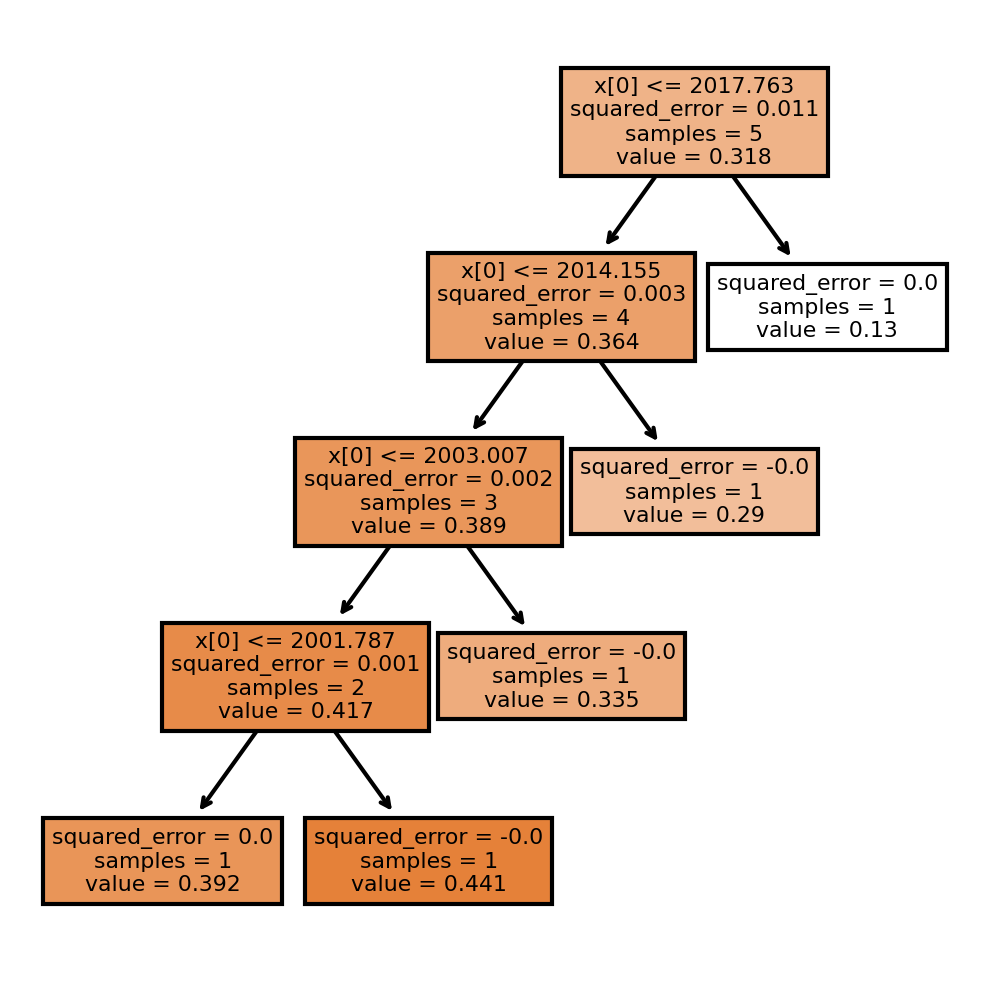

In [74]:
numeroArbol = 20
arbolDelBosque = regression_model.estimators_[numeroArbol]

plt.figure(figsize = (4,4), dpi = 300)
tree.plot_tree(arbolDelBosque,filled = True)
plt.show()

R2_prom = 0.3596805740589721


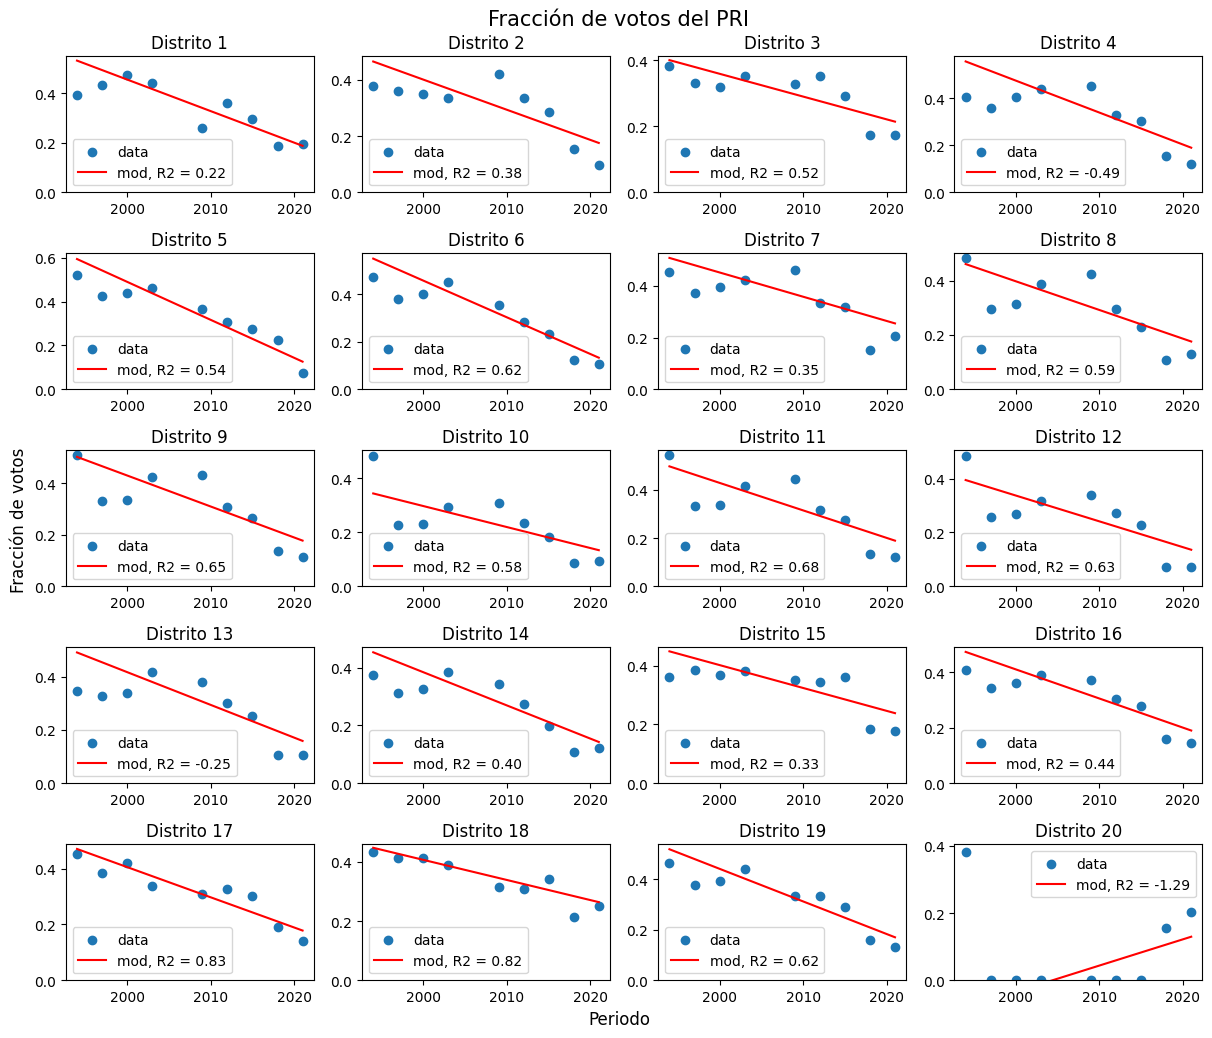

In [68]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'
r2_sum = []

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron

x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]
x.fillna(0, inplace = True)

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        y = x[distrito]

        # Grafica los datos en el subgráfico actual
        axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')

        # MODELO DE REGRESION LINEAL ############################################################################################################
        
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        regression_model = Ridge(alpha = 1.5)

        # Entrenar el modelo con el conjunto de entrenamiento
        regression_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = regression_model.predict(X_test)
        y_pred_t = regression_model.predict(x.index.values.reshape(-1, 1))


        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)
        r2_sum.append(r2)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
        y_modelo = y_modelo.ravel()
        
        # MODELO DE REGRESIÓN POLINOMIAL ##########################################################################################################
        '''
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        poly_features = PolynomialFeatures(degree=2)
        X_poly = poly_features.fit_transform(X_train)
        poly_model = LinearRegression()

        # Entrenar el modelo polinomial
        poly_model.fit(X_poly, y_train)

        # Realizar predicciones en el conjunto de prueba
        X_test_poly = poly_features.transform(X_test)
        y_pred = poly_model.predict(X_test_poly)

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = poly_model.coef_[0][2] * x_modelo**2 + poly_model.coef_[0][1] * x_modelo + poly_model.intercept_
        y_modelo = y_modelo.ravel()
        '''
        #########################################################################################################################################
        
        axs[i, j].plot(x_modelo, y_modelo, color='red')

        axs[i, j].set_title(f'Distrito {distrito}')
        axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
R2_Ridge = np.mean(r2_sum)
print(f'R2_prom = {R2_Ridge}')

fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

R2 promedio = 0.5551817415423854


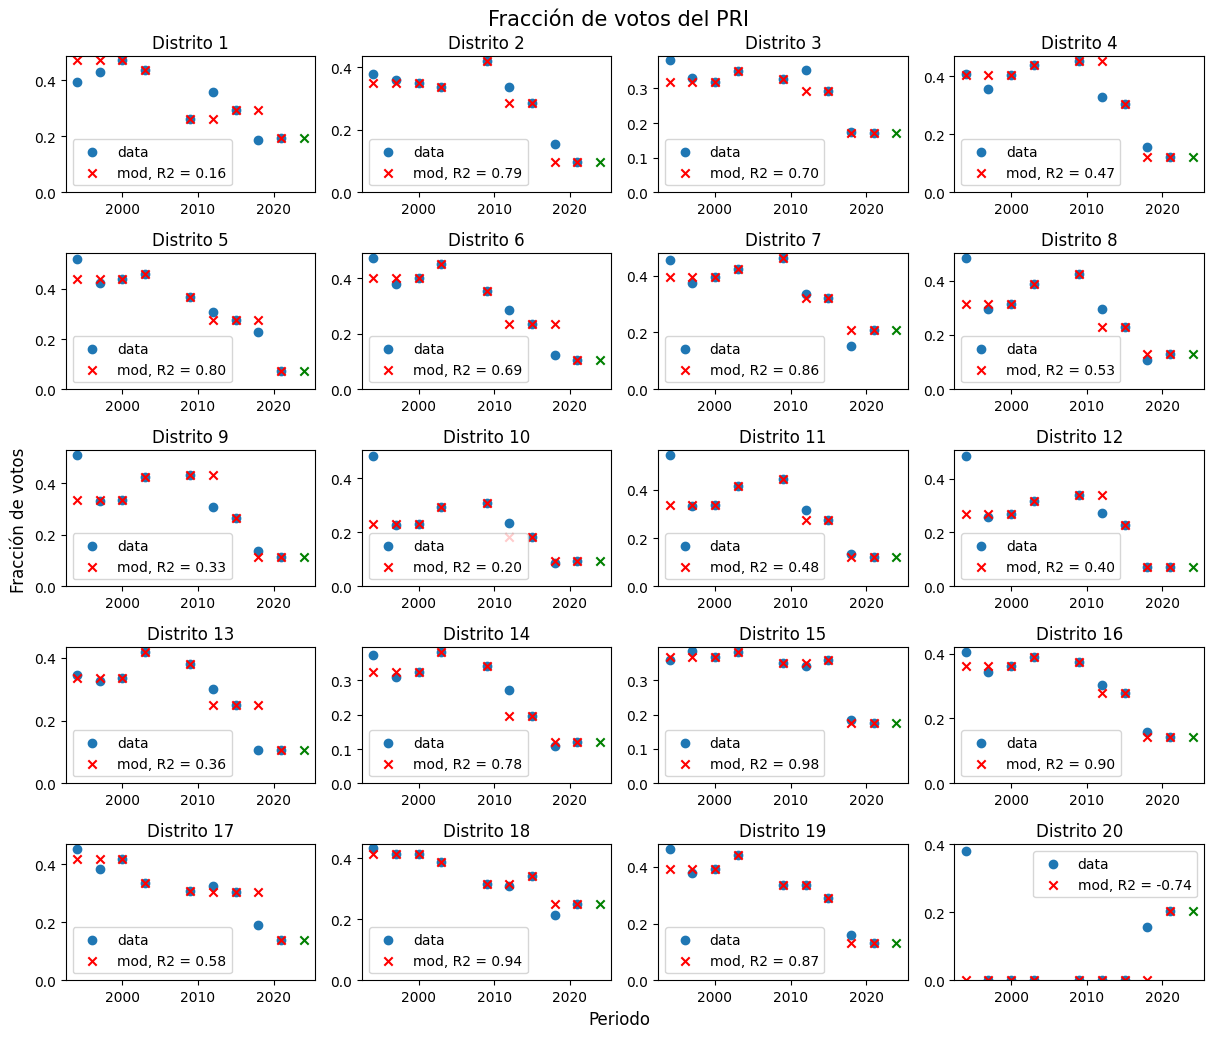

In [69]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'
r2_sum = []

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron

x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]
x.fillna(0, inplace = True)

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        y = x[distrito]

        # Grafica los datos en el subgráfico actual
        axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')

        # MODELO DE REGRESION LINEAL ############################################################################################################
        
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        regression_model = ExtraTreeRegressor()

        # Entrenar el modelo con el conjunto de entrenamiento
        regression_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = regression_model.predict(X_test)
        y_pred_t = regression_model.predict(x.index.values.reshape(-1, 1))


        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)
        r2_sum.append(r2)

        #x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        #y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
        #y_modelo = y_modelo.ravel()
        
        # MODELO DE REGRESIÓN POLINOMIAL ##########################################################################################################
        '''
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        poly_features = PolynomialFeatures(degree=2)
        X_poly = poly_features.fit_transform(X_train)
        poly_model = LinearRegression()

        # Entrenar el modelo polinomial
        poly_model.fit(X_poly, y_train)

        # Realizar predicciones en el conjunto de prueba
        X_test_poly = poly_features.transform(X_test)
        y_pred = poly_model.predict(X_test_poly)

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = poly_model.coef_[0][2] * x_modelo**2 + poly_model.coef_[0][1] * x_modelo + poly_model.intercept_
        y_modelo = y_modelo.ravel()
        '''
        #########################################################################################################################################
        
        axs[i, j].scatter(x.index.values.reshape(-1, 1), y_pred_t, color='red', marker = 'x')

        pred_2024 = regression_model.predict(np.array([[2024]]))
        axs[i, j].scatter(np.array([[2024]]), pred_2024, color='green', marker = 'x')

        axs[i, j].set_title(f'Distrito {distrito}')
        axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
R2_ExtraTreeRegressor = np.mean(r2_sum)
print(f'R2 promedio = {R2_ExtraTreeRegressor}')

fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

R2 promedio = 0.48281164910636176


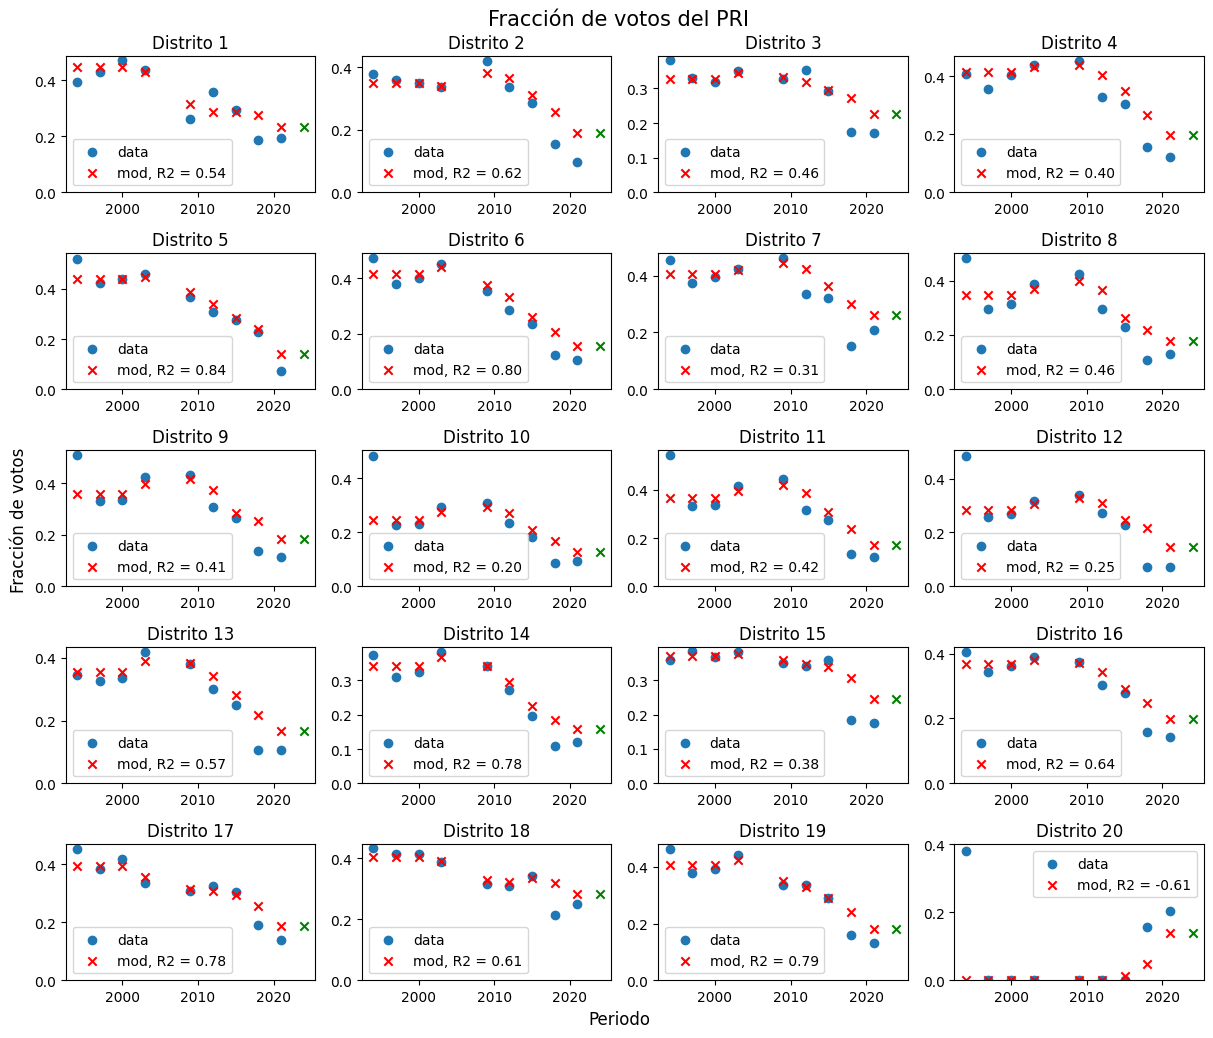

In [70]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'
r2_sum = []

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron

x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]
x.fillna(0, inplace = True)

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        y = x[distrito]

        # Grafica los datos en el subgráfico actual
        axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')

        # MODELO DE REGRESION LINEAL ############################################################################################################
        
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        regression_model = RandomForestRegressor()

        # Entrenar el modelo con el conjunto de entrenamiento
        regression_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = regression_model.predict(X_test)
        y_pred_t = regression_model.predict(x.index.values.reshape(-1, 1))


        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)
        r2_sum.append(r2)

        #x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        #y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
        #y_modelo = y_modelo.ravel()
        
        # MODELO DE REGRESIÓN POLINOMIAL ##########################################################################################################
        '''
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        poly_features = PolynomialFeatures(degree=2)
        X_poly = poly_features.fit_transform(X_train)
        poly_model = LinearRegression()

        # Entrenar el modelo polinomial
        poly_model.fit(X_poly, y_train)

        # Realizar predicciones en el conjunto de prueba
        X_test_poly = poly_features.transform(X_test)
        y_pred = poly_model.predict(X_test_poly)

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = poly_model.coef_[0][2] * x_modelo**2 + poly_model.coef_[0][1] * x_modelo + poly_model.intercept_
        y_modelo = y_modelo.ravel()
        '''
        #########################################################################################################################################
        
        axs[i, j].scatter(x.index.values.reshape(-1, 1), y_pred_t, color='red', marker = 'x')

        pred_2024 = regression_model.predict(np.array([[2024]]))
        axs[i, j].scatter(np.array([[2024]]), pred_2024, color='green', marker = 'x')

        axs[i, j].set_title(f'Distrito {distrito}')
        axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
R2_Random_Forest = np.mean(r2_sum)

print(f'R2 promedio = {R2_Random_Forest}')

fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

In [71]:
Modelos = ['Linear Regression', "Ridge", 'Extra Tree Forest', 'Extra Trees Forest', 'Random Forest']
R2_modelos = [R2_LinearRegression, R2_Ridge, R2_ExtraTreeRegressor, R2_ExtraTreesForest, R2_Random_Forest]
Tabla_modelos = pd.DataFrame({'Modelo': Modelos, 'R2': R2_modelos})

In [72]:
Tabla_modelos

Modelo     R2
0   Linear Regression -54.02
1               Ridge   0.36
2   Extra Tree Forest   0.56
3  Extra Trees Forest   0.67
4       Random Forest   0.48

R2_prom = 0.35499725456261405


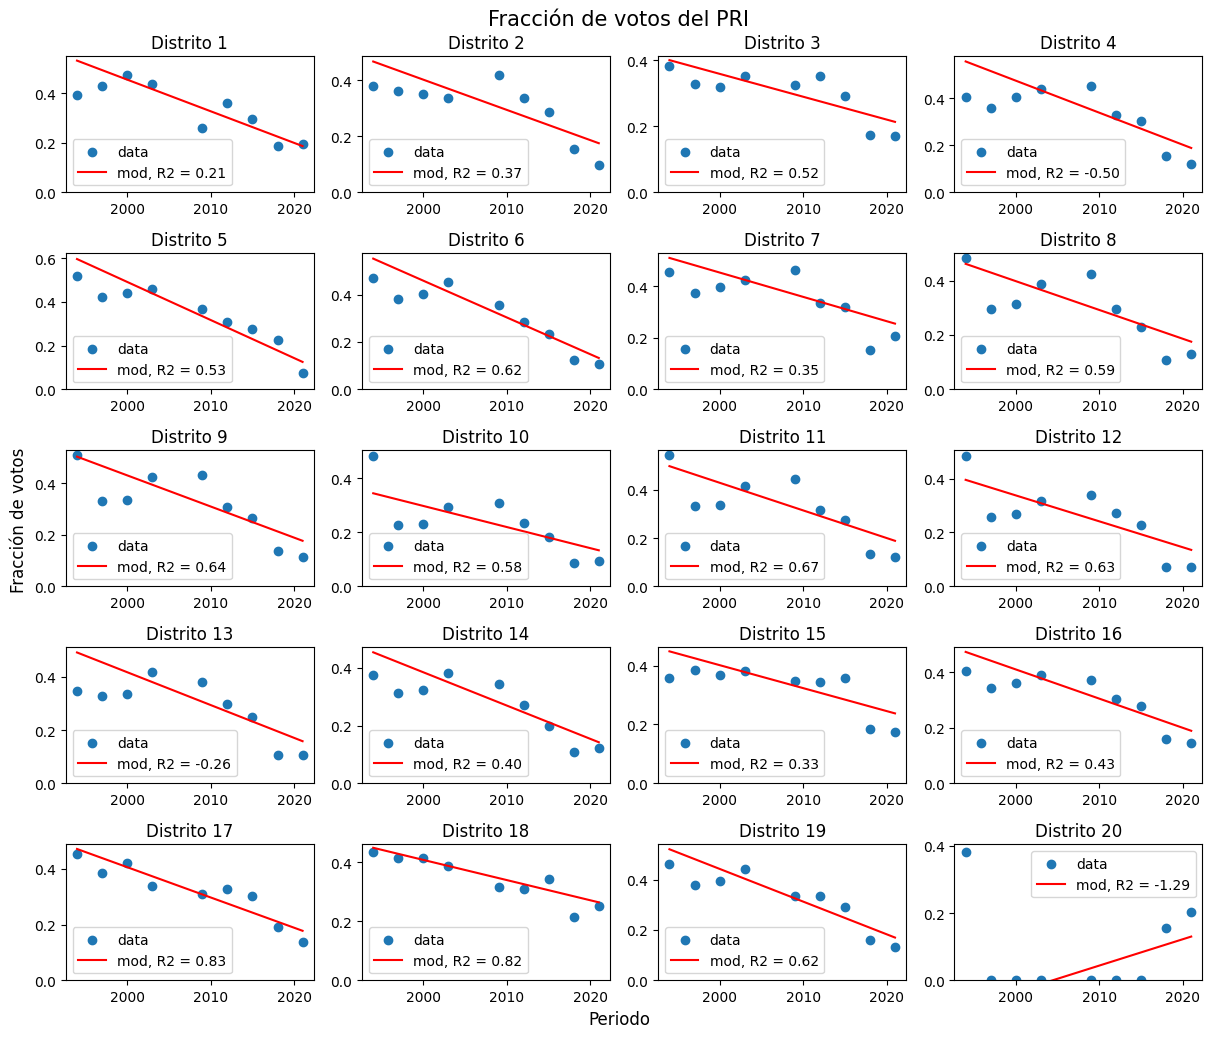

In [86]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'
r2_sum = []

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron

x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]
x.fillna(0, inplace = True)

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        y = x[distrito]

        # Grafica los datos en el subgráfico actual
        axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')

        # MODELO DE REGRESION LINEAL ############################################################################################################
        
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        regression_model = Lars()

        # Entrenar el modelo con el conjunto de entrenamiento
        regression_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = regression_model.predict(X_test)
        y_pred_t = regression_model.predict(x.index.values.reshape(-1, 1))


        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)
        r2_sum.append(r2)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
        y_modelo = y_modelo.ravel()
        
        # MODELO DE REGRESIÓN POLINOMIAL ##########################################################################################################
        '''
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        poly_features = PolynomialFeatures(degree=2)
        X_poly = poly_features.fit_transform(X_train)
        poly_model = LinearRegression()

        # Entrenar el modelo polinomial
        poly_model.fit(X_poly, y_train)

        # Realizar predicciones en el conjunto de prueba
        X_test_poly = poly_features.transform(X_test)
        y_pred = poly_model.predict(X_test_poly)

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = poly_model.coef_[0][2] * x_modelo**2 + poly_model.coef_[0][1] * x_modelo + poly_model.intercept_
        y_modelo = y_modelo.ravel()
        '''
        #########################################################################################################################################
        
        axs[i, j].plot(x_modelo, y_modelo, color='red')

        axs[i, j].set_title(f'Distrito {distrito}')
        axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
R2_Ridge = np.mean(r2_sum)
print(f'R2_prom = {R2_Ridge}')

fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

TypeError: 'module' object is not callable

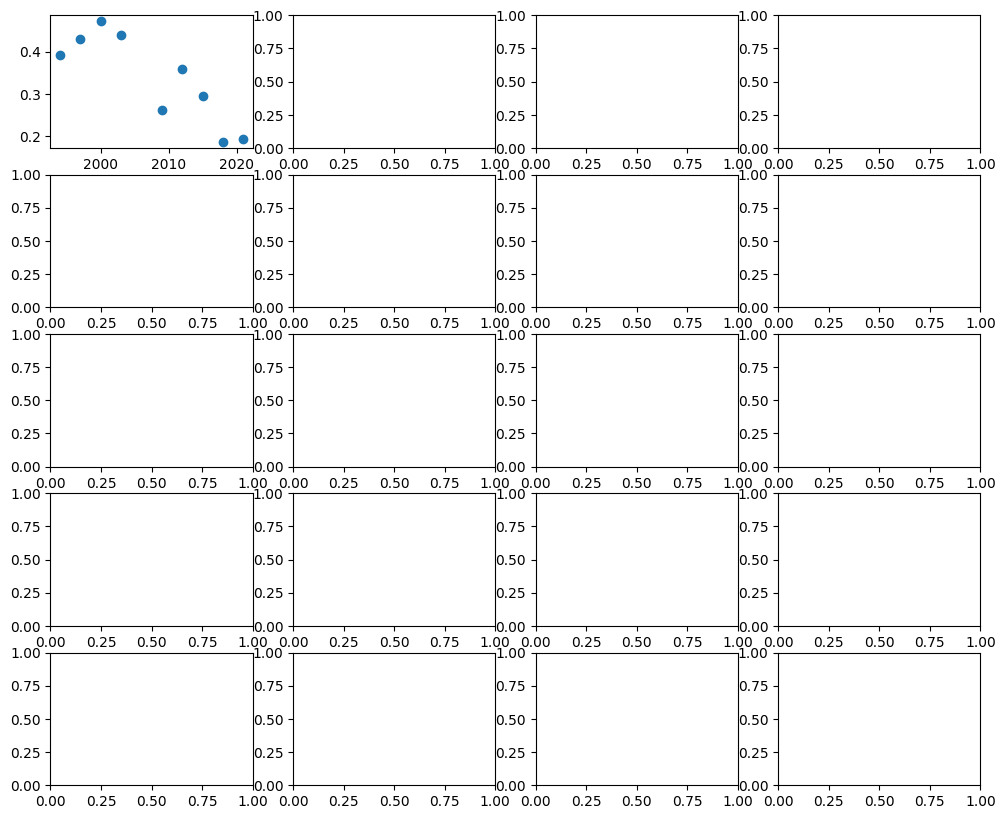

In [112]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'
r2_sum = []

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron

x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]
x.fillna(0, inplace = True)

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        y = x[distrito]

        # Grafica los datos en el subgráfico actual
        axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')

        # MODELO DE REGRESION LINEAL ############################################################################################################
        
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        regressor = LinearRegression()
        regression_model = ForecasterAutoreg(regressor = regressor, lags=3)

        # Entrenar el modelo con el conjunto de entrenamiento
        regression_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = regression_model.predict(X_test)
        y_pred_t = regression_model.predict(x.index.values.reshape(-1, 1))


        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)
        r2_sum.append(r2)

        #x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        #y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
        #y_modelo = y_modelo.ravel()
        
        # MODELO DE REGRESIÓN POLINOMIAL ##########################################################################################################
        '''
        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.4, random_state=42)

        # Crear el modelo de regresión lineal
        poly_features = PolynomialFeatures(degree=2)
        X_poly = poly_features.fit_transform(X_train)
        poly_model = LinearRegression()

        # Entrenar el modelo polinomial
        poly_model.fit(X_poly, y_train)

        # Realizar predicciones en el conjunto de prueba
        X_test_poly = poly_features.transform(X_test)
        y_pred = poly_model.predict(X_test_poly)

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = poly_model.coef_[0][2] * x_modelo**2 + poly_model.coef_[0][1] * x_modelo + poly_model.intercept_
        y_modelo = y_modelo.ravel()
        '''
        #########################################################################################################################################
        
        axs[i, j].plot(x_modelo, y_modelo, color='red')

        axs[i, j].set_title(f'Distrito {distrito}')
        axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
R2_Ridge = np.mean(r2_sum)
print(f'R2_prom = {R2_Ridge}')

fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

In [91]:
def st_exp(x, c, tau, beta):
    return c*(np.exp(-(x*tau**beta)))

In [98]:
def st_exp(x, c, tau, beta):
    return c*(np.exp(-(x*tau**beta)))

def get_index(x0, x):
    return np.argmin(abs(x - x0))
init_vals = [max(y) - min(y), -1*x[get_index(np.mean(y), y)]/np.log(0.5),0.5]
best_vals, covar = curve_fit(st_exp, x, y, p0 = init_vals)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.